<a href="https://colab.research.google.com/github/vishal-suri/ExData_Plotting1/blob/master/Hackathon_Sample_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 plotly==5.24.1 sklearn-pandas==2.2.0 nb-black -q --user
## Importing the libraries

import pandas as pd
from sklearn.linear_model import LinearRegression

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
# Import libraries to read and manipulate data
import pandas as pd
import numpy as np
import plotly.express as px

# Import libaries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library to split data
from sklearn.model_selection import train_test_split, GridSearchCV

# Import library to build prediction model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import statsmodels.formula.api as smf


from datetime import datetime

# Import library to measure performance
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score, #Needed for logistics regression
    precision_recall_curve,#Needed for logistics regression
    roc_curve, #Needed for logistics regression
)
# To build logistic regression model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


#To build customer segmentation through Kmeans

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0


# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning #Needed for logistics regression

warnings.simplefilter("ignore", ConvergenceWarning) #Needed for logistics regression

# Loading the Training Data and using the Training Data to build the Model

In [3]:
df_train = pd.read_csv('Train_dataset_.csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [4]:
data=df_train.copy()

In [5]:
data.shape

(3493, 34)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [7]:
## Checking for the null values

data.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,99
Endorsed By,0
Instagram Popularity Quotient,56
Fire Audit,0


In [8]:
# Statistical summary of data
print(data.describe(include='all').T)

                                count unique             top  freq  \
Registration Number            3493.0    NaN             NaN   NaN   
Annual Turnover                3493.0    NaN             NaN   NaN   
Cuisine                          3493     20   tibetan,greek   686   
City                             3493    297       Bangalore   553   
Restaurant Location              3493      2  Near Party Hub  2658   
Opening Day of Restaurant        3493   1778      27-12-2009    10   
Facebook Popularity Quotient   3394.0    NaN             NaN   NaN   
Endorsed By                      3493      3    Not Specific  1961   
Instagram Popularity Quotient  3437.0    NaN             NaN   NaN   
Fire Audit                     3493.0    NaN             NaN   NaN   
Liquor License Obtained        3493.0    NaN             NaN   NaN   
Situated in a Multi Complex    3493.0    NaN             NaN   NaN   
Dedicated Parking              3493.0    NaN             NaN   NaN   
Open Sitting Availab

In [ ]:
#Univariate analysis


In [9]:
#determine the linear regression between facebook popularity quotient and instagram popularity quotient
LR=LinearRegression()
#drop rows from data where either facebook or instagram popularity quotients are NaN
newdata=data.dropna(subset=['Facebook Popularity Quotient','Instagram Popularity Quotient'])
LR.fit(newdata[['Instagram Popularity Quotient']],newdata['Facebook Popularity Quotient'])

LinearRegression()

In [10]:
#Get LR score and p value
print(LR.score(newdata[['Instagram Popularity Quotient']],newdata['Facebook Popularity Quotient']))

0.41403527628872705


In [11]:
coeff=LR.coef_
intercept=LR.intercept_
print(coeff,intercept)

[0.57592016] 35.1109966574785


In [12]:
## Importing Simple Imputer to treat the null values

from sklearn.impute import SimpleImputer

In [13]:
## Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation

SI = SimpleImputer(strategy='mean')

In [15]:
## Fitting the Simple Imputer function to get the mean of the variable

SI.fit(data[['Instagram Popularity Quotient']])

SimpleImputer()

In [14]:
#Where both facebook and insta values are absent, impute with average
mark=data[data['Instagram Popularity Quotient'].isna() & data['Facebook Popularity Quotient'].isna()].index.tolist()
#for these rows, add mean values of instagram and facebook popularity values in the data
for i in mark:
  data.loc[i,'Instagram Popularity Quotient']=data['Instagram Popularity Quotient'].mean()
  data.loc[i,'Facebook Popularity Quotient']=data['Facebook Popularity Quotient'].mean()
#  data['Instagram Popularity Quotient']=data['Instagram Popularity Quotient'].fillna(data['Instagram Popularity Quotient'].mean()

In [15]:
#For all other entries where facebook or insta rating is missing, use the linear regression to fill the data
mark=data[data['Facebook Popularity Quotient'].isna()].index.tolist()
for i in mark:
  data.loc[i,'Facebook Popularity Quotient']=data.loc[i,'Instagram Popularity Quotient']*LR.coef_+LR.intercept_


In [16]:
mark=data[data['Instagram Popularity Quotient'].isna()].index.tolist()
for i in mark:
  data.loc[i,'Instagram Popularity Quotient']=(data.loc[i,'Facebook Popularity Quotient']-LR.intercept_)/LR.coef_

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3493 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3493 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [18]:
X=data.select_dtypes(include=np.number).copy()
X.drop('Registration Number',axis=1,inplace=True)
X.head()

,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,42000000,84.300000,95.8,1,1,1,0,1,2.0,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,50000000,85.400000,85.0,1,1,1,1,0,2.0,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,32500000,85.000000,68.2,1,1,1,1,0,2.0,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,110000000,85.600000,83.6,0,1,1,1,1,1.0,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,20000000,79.341665,76.8,1,1,1,1,1,NaN,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [19]:
scaler=StandardScaler()
subset_scaled=scaler.fit_transform(X)
subset_scaled_df = pd.DataFrame(subset_scaled, columns=X.columns)
subset_scaled_df.describe()

,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
count,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.444000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.281000e+03,2.728000e+03,1.010000e+03,7.860000e+02,2.050000e+02,3.468000e+03,3.493000e+03,3.493000e+03,3.493000e+03,3.493000e+03
mean,5.899152e-17,-8.289326e-16,-7.872317e-16,-7.119667e-17,-4.663382e-16,-5.848298e-17,-5.288895e-17,-2.491883e-17,-4.322262e-16,6.814538e-17,9.153857e-17,-4.576929e-17,1.718891e-16,-9.560695e-17,1.098463e-16,1.245942e-16,5.159610e-16,1.315338e-16,4.572800e-17,-2.259996e-16,-1.039819e-16,-2.018122e-16,-1.454446e-16,-1.586669e-16,6.356845e-18,6.712829e-17
std,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000145e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000152e+00,1.000183e+00,1.000495e+00,1.000637e+00,1.002448e+00,1.000144e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00
min,-1.257646e+00,-3.592476e+00,-4.215724e+00,-1.932113e+00,-9.175790e+00,-2.052665e+00,-2.011887e+00,-2.001074e+00,-3.551429e+00,-3.425658e+00,-6.569303e-01,-1.580058e+00,-3.235425e+00,-3.859113e+00,-2.907784e+00,-1.464614e+00,-1.926461e+00,-2.986372e+00,-2.249666e+00,-2.729934e+00,-1.758851e+00,-3.133587e+00,-3.722463e+00,-2.422645e+00,-1.621526e+00,-3.311785e+00
25%,-5.878428e-01,-6.145819e-01,-7.444793e-01,5.175680e-01,1.089824e-01,4.871716e-01,4.970459e-01,4.997316e-01,2.815768e-01,-8.848737e-01,-6.569303e-01,-8.793033e-01,-4.923814e-01,-5.761414e-01,-5.255880e-01,-8.840538e-01,-1.149483e+00,-1.003936e+00,-1.085648e+00,-6.736540e-01,-6.528249e-01,-6.942425e-01,-4.737173e-01,-8.241754e-01,-6.178952e-01,-6.729637e-01
50%,-3.352289e-02,1.042200e-01,-1.030237e-02,5.175680e-01,1.089824e-01,4.871716e-01,4.970459e-01,4.997316e-01,2.815768e-01,3.855183e-01,-6.569303e-01,-1.785489e-01,4.219664e-01,5.181826e-01,2.684773e-01,-3.034936e-01,4.044739e-01,-1.271724e-02,7.836952e-02,3.544859e-01,4.532008e-01,2.814953e-01,6.774034e-02,2.414713e-01,-1.160798e-01,-1.451994e-01
75%,2.898304e-01,7.819475e-01,7.247743e-01,5.175680e-01,1.089824e-01,4.871716e-01,4.970459e-01,4.997316e-01,2.815768e-01,3.855183e-01,1.522232e+00,8.725826e-01,4.219664e-01,5.181826e-01,1.062543e+00,8.576270e-01,1.181452e+00,9.785012e-01,7.836952e-02,3.544859e-01,4.532008e-01,7.693642e-01,6.091980e-01,7.742947e-01,8.875509e-01,9.103292e-01
max,1.705801e+01,2.030609e+00,2.742502e+00,5.175680e-01,1.089824e-01,4.871716e-01,4.970459e-01,4.997316e-01,2.815768e-01,2.926302e+00,1.522232e+00,1.573337e+00,3.165010e+00,2.706831e+00,3.444739e+00,1.438187e+00,1.181452e+00,3.952156e+00,3.570423e+00,3.438906e+00,2.665252e+00,1.745102e+00,1.692113e+00,2.905588e+00,3.396628e+00,1.965858e+00


In [20]:
#convert restaurant tier back to 1 and 2
subset_scaled_df['Resturant Tier']=data['Resturant Tier']

#Compute averages of all numerical variables when restaurant_tier=1
tier1mean=subset_scaled_df[subset_scaled_df['Resturant Tier']==1].mean(numeric_only=True)
print(tier1mean)

Annual Turnover                  0.639749
Facebook Popularity Quotient     0.480255
Instagram Popularity Quotient    0.418402
Fire Audit                      -0.073067
Liquor License Obtained          0.072284
Situated in a Multi Complex      0.075578
Dedicated Parking               -0.048374
Open Sitting Available          -0.043922
Resturant Tier                   1.000000
Restaurant Zomato Rating         0.355390
Restaurant City Tier             0.350824
Order Wait Time                  0.124742
Staff Responsivness              0.617124
Value for Money                  0.656595
Hygiene Rating                   0.899336
Food Rating                     -0.023540
Overall Restaurant Rating        0.302413
Live Music Rating                0.579055
Comedy Gigs Rating               0.376472
Value Deals Rating               0.438416
Live Sports Rating               0.648382
Ambience                        -0.179377
Lively                           0.149066
Service                         -0

In [21]:
#Compute averages of all numerical variables when restaurant_tier=2
tier2mean=subset_scaled_df[subset_scaled_df['Resturant Tier']==2].mean(numeric_only=True)
print(tier2mean)

Annual Turnover                 -0.056809
Facebook Popularity Quotient    -0.039592
Instagram Popularity Quotient   -0.034438
Fire Audit                       0.007058
Liquor License Obtained         -0.007405
Situated in a Multi Complex     -0.003922
Dedicated Parking               -0.000652
Open Sitting Available           0.008348
Resturant Tier                   2.000000
Restaurant Zomato Rating        -0.031709
Restaurant City Tier            -0.027288
Order Wait Time                 -0.011760
Staff Responsivness             -0.052830
Value for Money                 -0.056929
Hygiene Rating                  -0.072938
Food Rating                      0.000705
Overall Restaurant Rating       -0.026259
Live Music Rating               -0.051776
Comedy Gigs Rating              -0.034071
Value Deals Rating              -0.030713
Live Sports Rating              -0.060952
Ambience                         0.016771
Lively                          -0.012180
Service                          0

In [22]:
#For all restaurants with missing restaurant tiers, compute their MSE difference from tier1, tier2 means on annual turnover, facebook popularity quotioent, insta popularity quotient, hygiene rating, live music rating, comdy rating, value deals and live sports rating
mark=subset_scaled_df[subset_scaled_df['Resturant Tier'].isna()].index.tolist()
#print(mark)
mse1=0
mse2=0
for i in mark:
  for cols in subset_scaled_df.columns:
    mse1= (subset_scaled_df.loc[i,cols]-tier1mean[cols])**2+mse1
    mse2= (subset_scaled_df.loc[i,cols]-tier2mean[cols])**2+mse2
  if mse1<mse2:
    subset_scaled_df.loc[i,'Resturant Tier']=1
  else:
    subset_scaled_df.loc[i,'Resturant Tier']=2
data['Resturant Tier'] =subset_scaled_df['Resturant Tier']


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3493 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3493 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [24]:
#Overall Restaurant Rating is correlated with Value for Money, Hygiene Rating, Live Music Rating, Comedy Gigs Rating, Value Deals Rating, and Live Sports Rating
#Where all of these are blank, impute with average
mark=data[data['Overall Restaurant Rating'].isna() & data['Value for Money'].isna() & data['Hygiene Rating'].isna() & data['Live Music Rating'].isna() & data['Comedy Gigs Rating'].isna() & data['Value Deals Rating'].isna() & data['Live Sports Rating'].isna()].index.tolist()
#for these rows, add mean values of instagram and facebook popularity values in the data
for i in mark:
  data.loc[i,'Overall Restaurant Rating']=data['Overall Restaurant Rating'].mean()
  data.loc[i,'Value for Money']=data['Value for Money'].mean()
  data.loc[i,'Hygiene Rating']=data['Hygiene Rating'].mean()
  data.loc[i,'Live Music Rating']=data['Live Music Rating'].mean()
  data.loc[i,'Comedy Gigs Rating']=data['Comedy Gigs Rating'].mean()
  data.loc[i,'Value Deals Rating']=data['Value Deals Rating'].mean()
  data.loc[i,'Live Sports Rating']=data['Live Sports Rating'].mean()
#  data['Instagram Popularity Quotient']=data['Instagram Popularity Quotient'].fillna(data['Instagram Popularity Quotient'].mean()

In [25]:
#Fill Ambience using mean imputation
SI = SimpleImputer(missing_values=np.nan, strategy='mean')
SI.fit(data[['Ambience']])
data['Ambience']=SI.transform(data[['Ambience']])


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3493 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3493 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [27]:
#Fill Live Music Rating, Comedy Gigs Rating, Value Deals Rating, Live Sports Rating as zero wherever missing
data['Live Music Rating']=data['Live Music Rating'].fillna(0)
data['Comedy Gigs Rating']=data['Comedy Gigs Rating'].fillna(0)
data['Value Deals Rating']=data['Value Deals Rating'].fillna(0)
data['Live Sports Rating']=data['Live Sports Rating'].fillna(0)

In [28]:
    from sklearn.experimental import enable_iterative_imputer # Required for IterativeImputer
    from sklearn.impute import IterativeImputer
    # Using Linear Regression as the estimator
    imputer = IterativeImputer(estimator=LinearRegression(), random_state=42)

    # Alternatively, using a more robust model like RandomForestRegressor
    # from sklearn.ensemble import RandomForestRegressor
    # imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), random_state=42)

In [29]:
    target_col='Overall Restaurant Rating'
    predictor_cols=['Value for Money','Hygiene Rating','Live Music Rating','Comedy Gigs Rating','Value Deals Rating','Live Sports Rating']
    numerical_subset = data[predictor_cols + [target_col]].copy()
    imputer = IterativeImputer(estimator=LinearRegression(), random_state=42)
    imputed_data = imputer.fit_transform(numerical_subset)
    imputed_data = pd.DataFrame(imputed_data, columns=numerical_subset.columns)
    #imputed_data.info()
    data['Overall Restaurant Rating']=imputed_data['Overall Restaurant Rating']

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3493 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3493 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [33]:
data.drop('Overall ResourceWarning',axis=1,inplace=True)

KeyError: "['Overall ResourceWarning'] not found in axis"

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3493 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3493 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [ ]:
## Transforming the variable --> Imputing the variable with its mean

IPQ = SI.transform(data[['Instagram Popularity Quotient']])
IPQ

array([[95.8],
       [85. ],
       [68.2],
       ...,
       [86.8],
       [86. ],
       [67. ]])

In [32]:
from threading import current_thread
#Convert opening day of restaurant into age
data['Opening Day of Restaurant']=pd.to_datetime(data['Opening Day of Restaurant'], format="%d-%m-%Y")
data['current']=pd.to_datetime(datetime.now())
data['Age']=data['current']-data['Opening Day of Restaurant']
data['Age']=data['Age'].dt.days
data.drop(['Opening Day of Restaurant','current'],axis=1,inplace=True)
data.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,84.300000,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,0.0,0.0,0.0,8.00000,8,6,6,6,6122
1,60002,50000000,"indian,irish",Indore,Near Party Hub,85.400000,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,0.0,4.0,0.0,0.0,5.00000,7,7,3,8,6260
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,85.000000,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,0.0,0.0,0.0,7.00000,10,5,2,8,5226
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,85.600000,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,0.0,0.0,0.0,7.00000,7,4,3,5,6198
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,79.341665,Tier A Celebrity,76.8,1,1,1,1,1,2.0,Bar,Greek,3,0,10,5,6,4,8,6.0,0.0,2.0,0.0,0.0,6.42301,6,2,4,6,5749


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Facebook Popularity Quotient   3493 non-null   float64
 6   Endorsed By                    3493 non-null   object 
 7   Instagram Popularity Quotient  3493 non-null   float64
 8   Fire Audit                     3493 non-null   int64  
 9   Liquor License Obtained        3493 non-null   int64  
 10  Situated in a Multi Complex    3493 non-null   int64  
 11  Dedicated Parking              3493 non-null   int64  
 12  Open Sitting Available         3493 non-null   i

In [34]:
#Functions to plot histogram and box plot in one go :
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,line_kws={'linestyle':'--'}
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,line_kws={'linestyle':'--'}
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.tight_layout
    plt.show()

In [35]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique() #occurences of different bins
    if count>10:
      n=7 #If there are too many unique values, plot the first 7
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=0, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [36]:
#get column names of all numerical columns
#data.drop(['Registration Number'],axis=1,inplace=True)
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

['Registration Number', 'Annual Turnover', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy', 'Age']


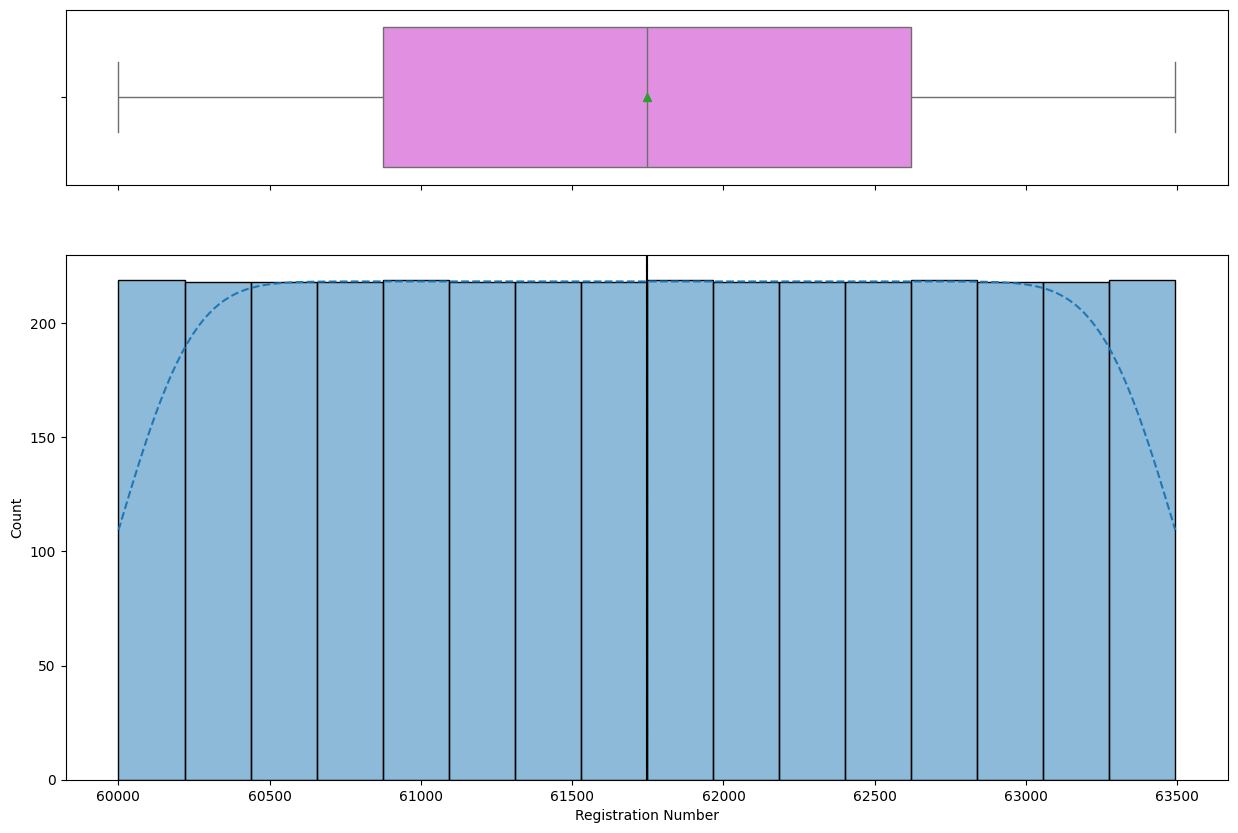

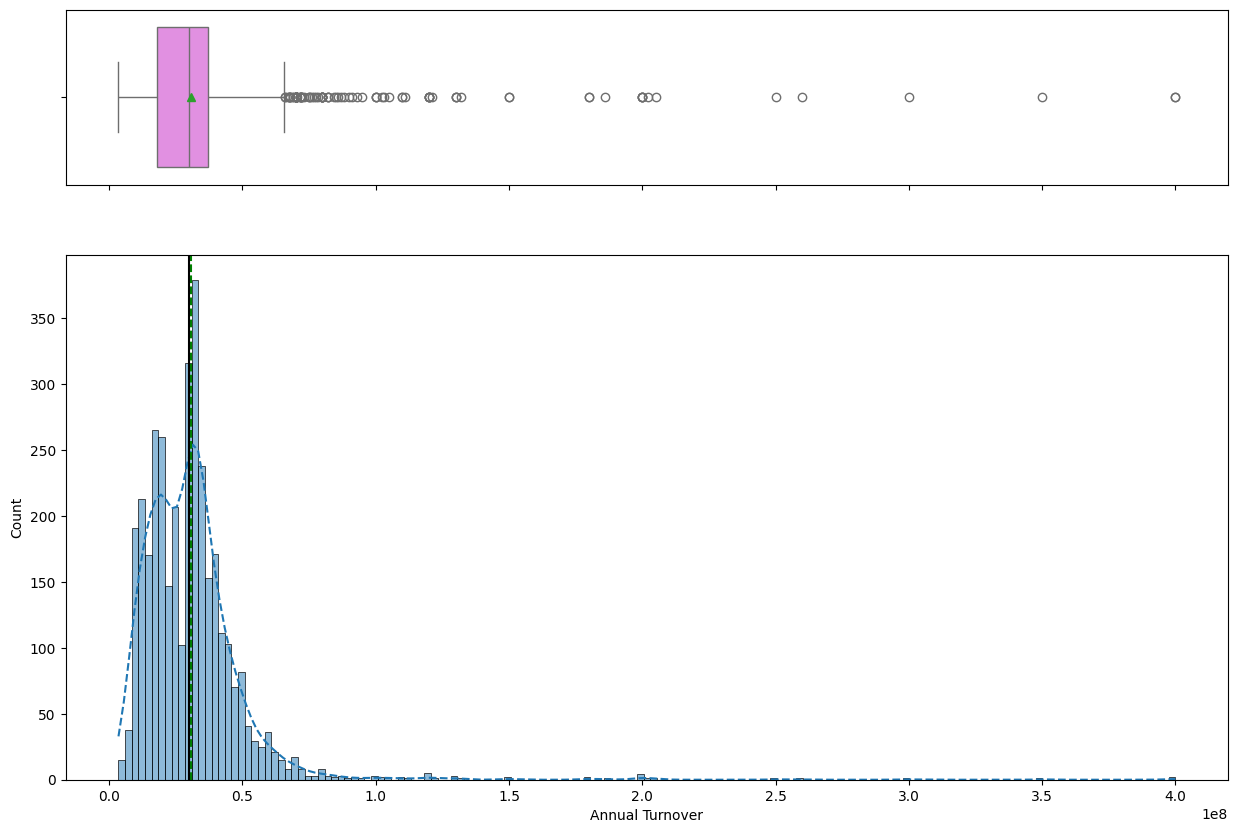

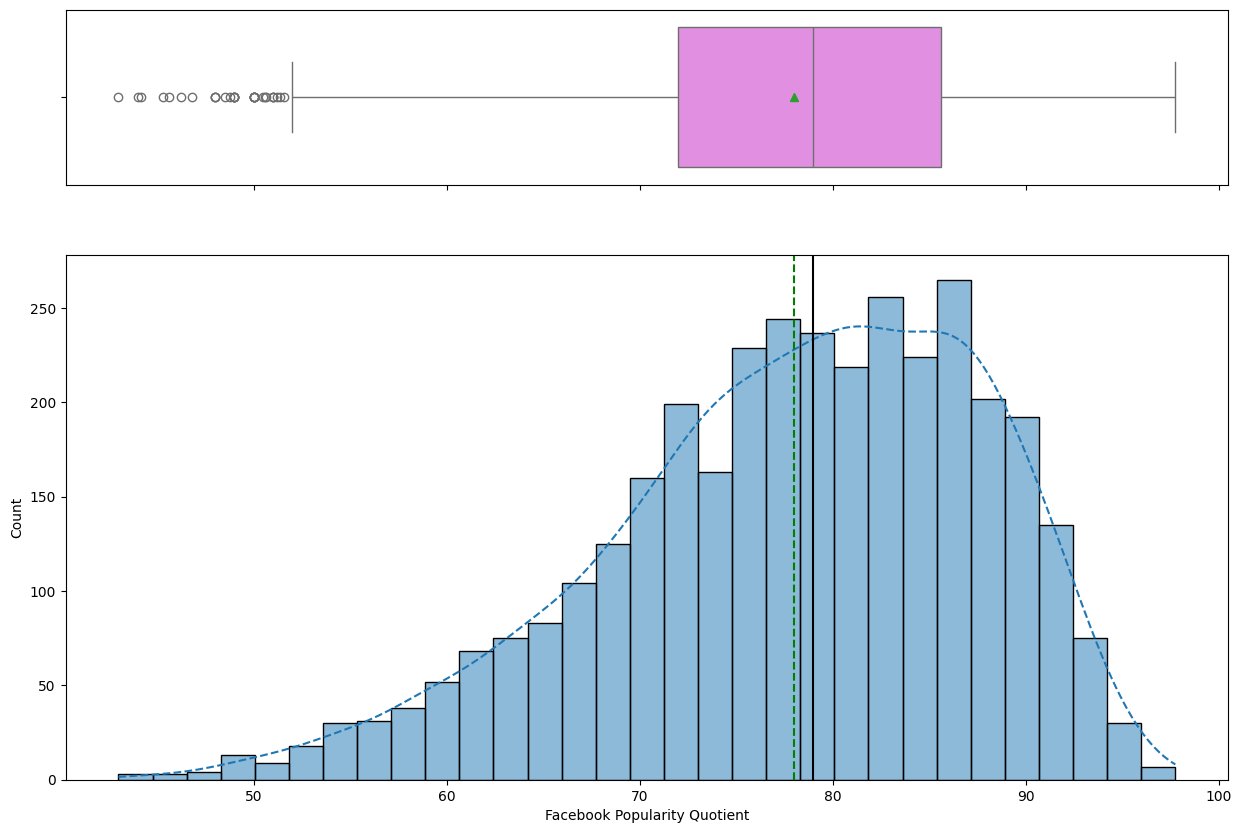

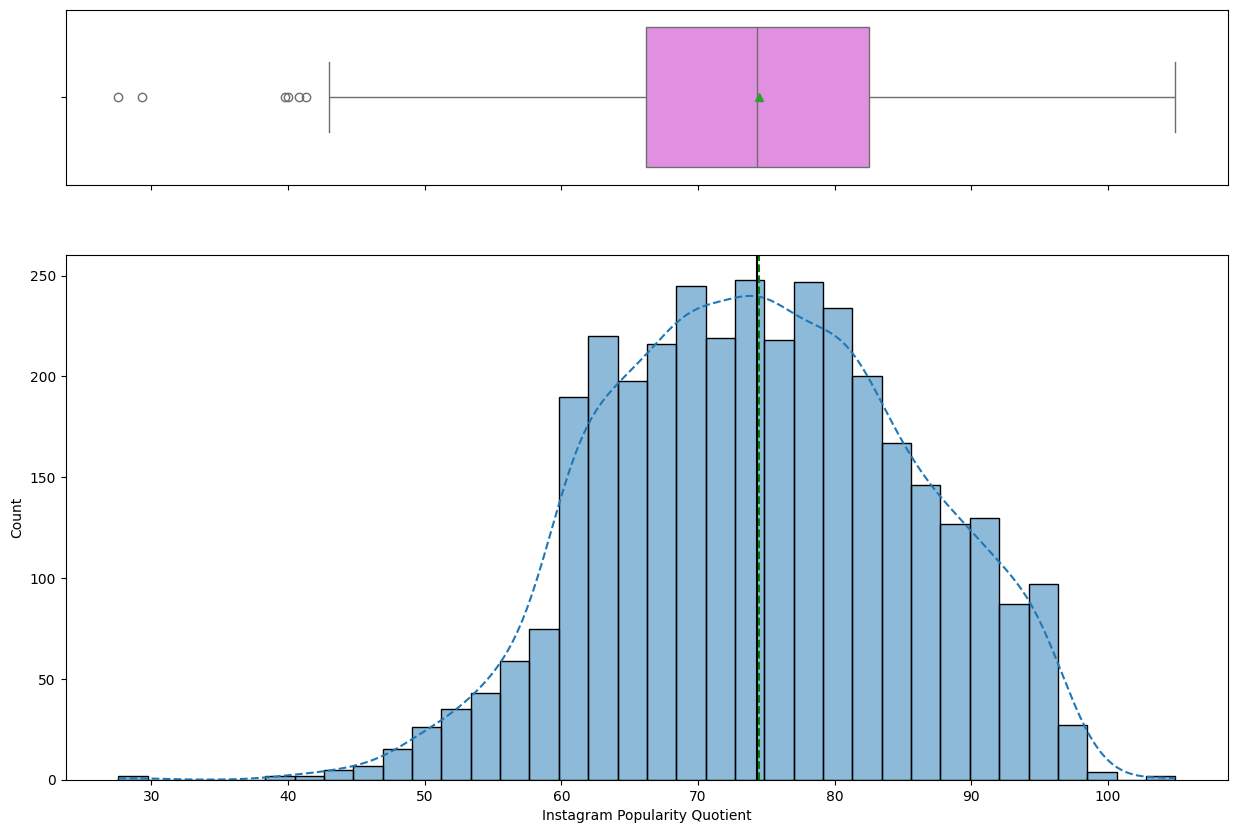

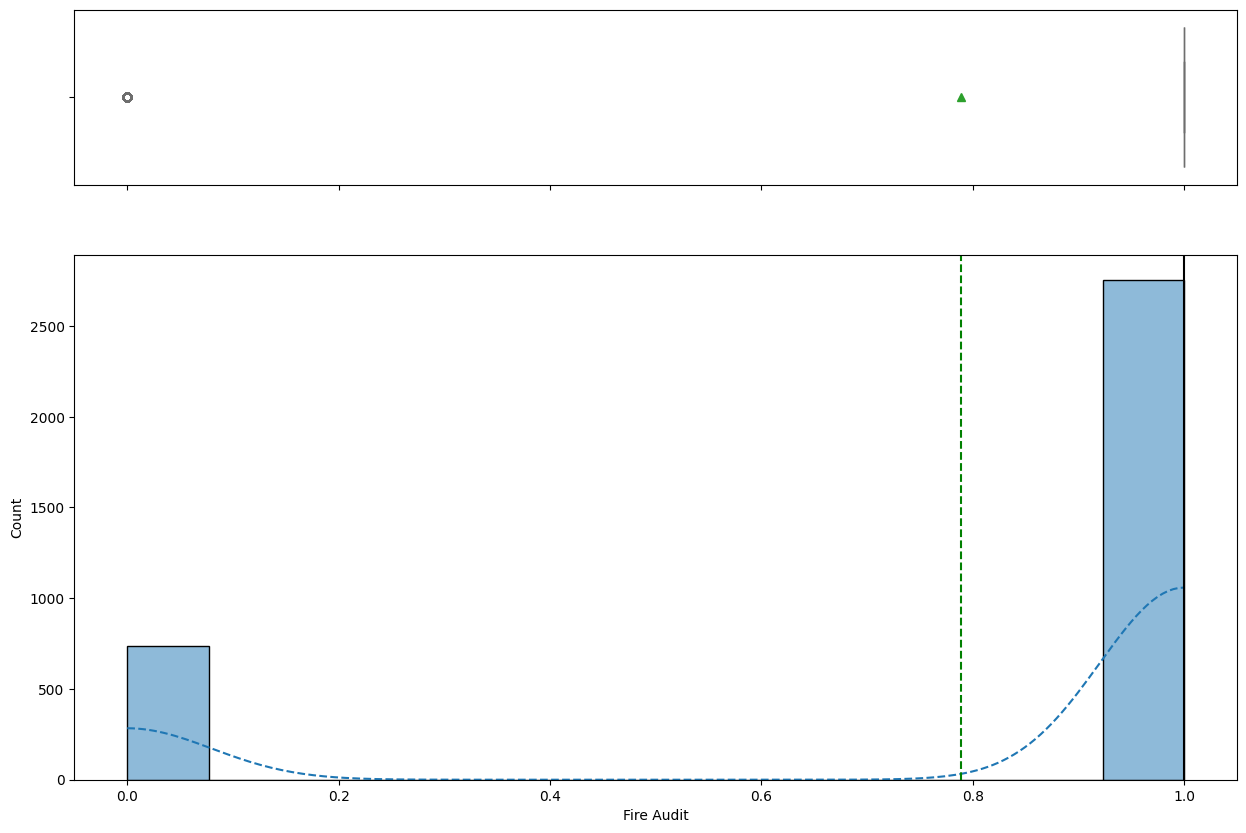

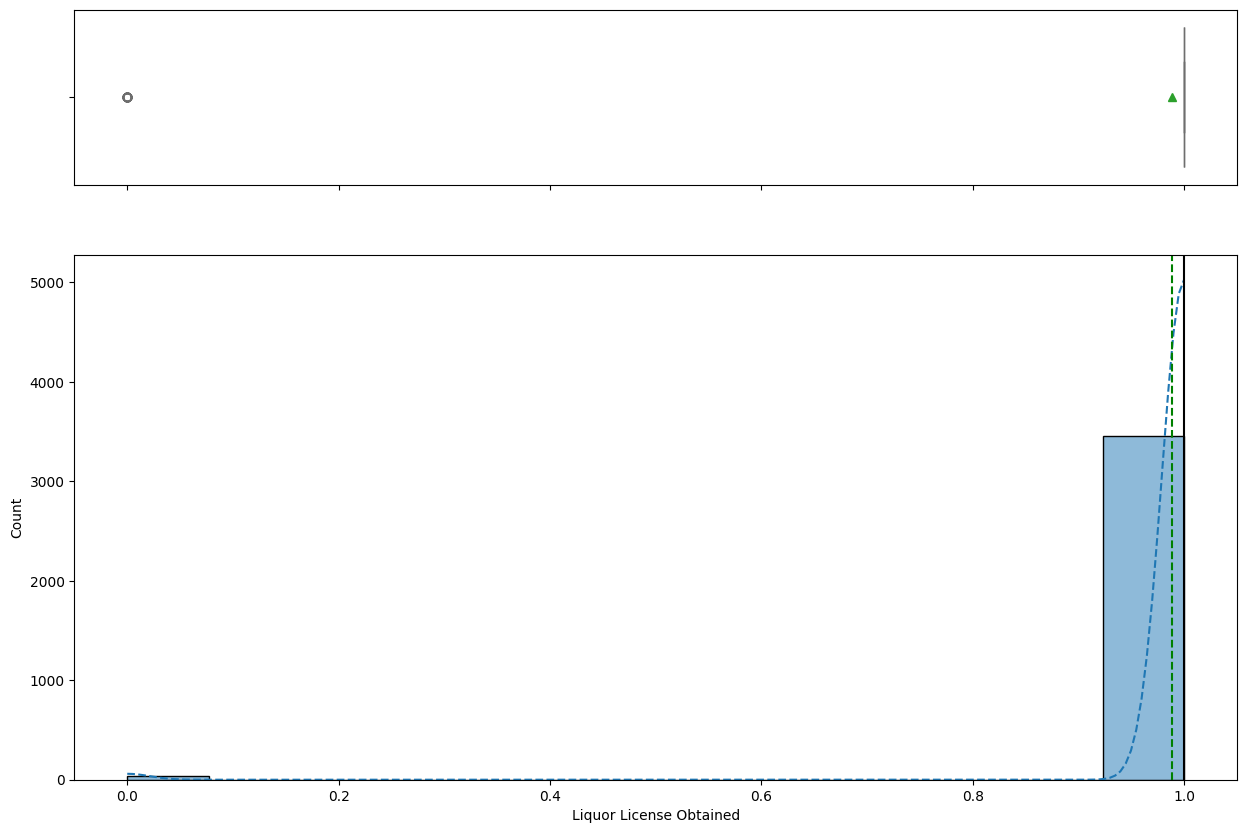

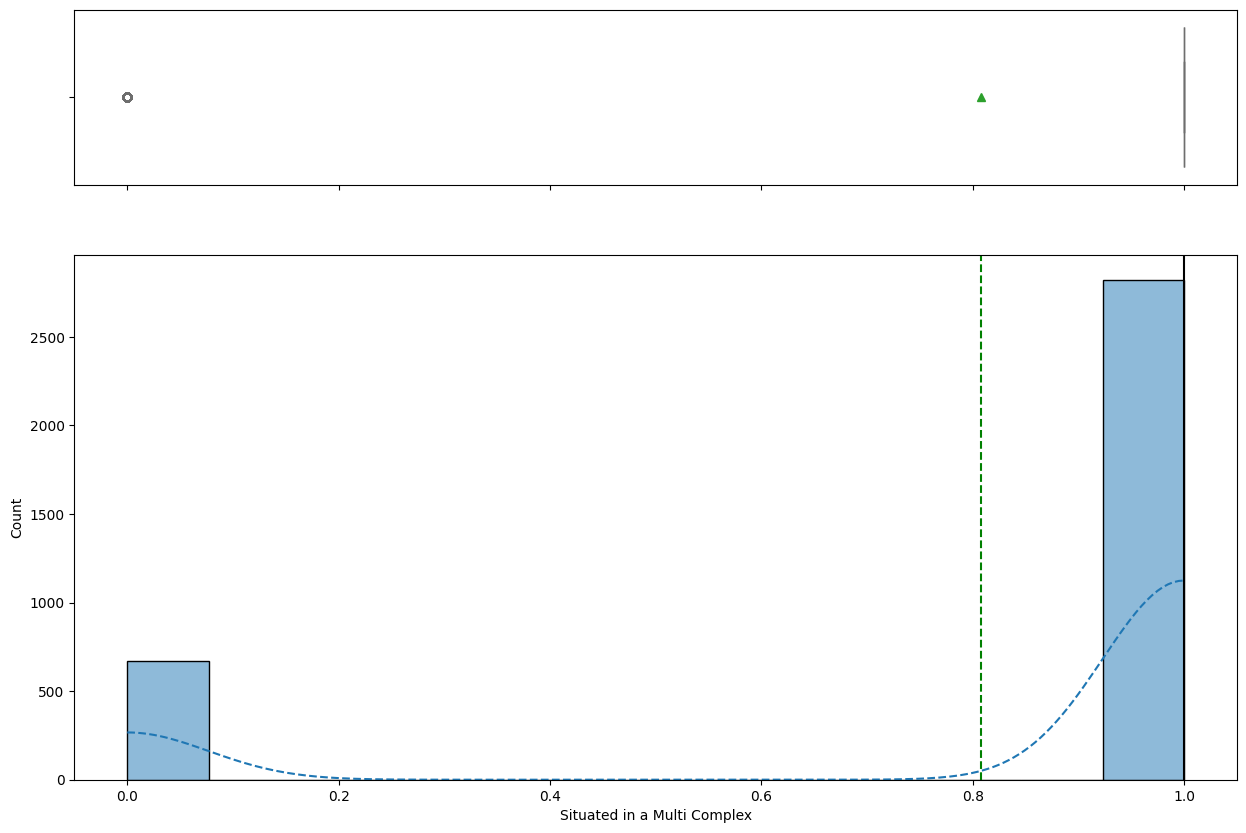

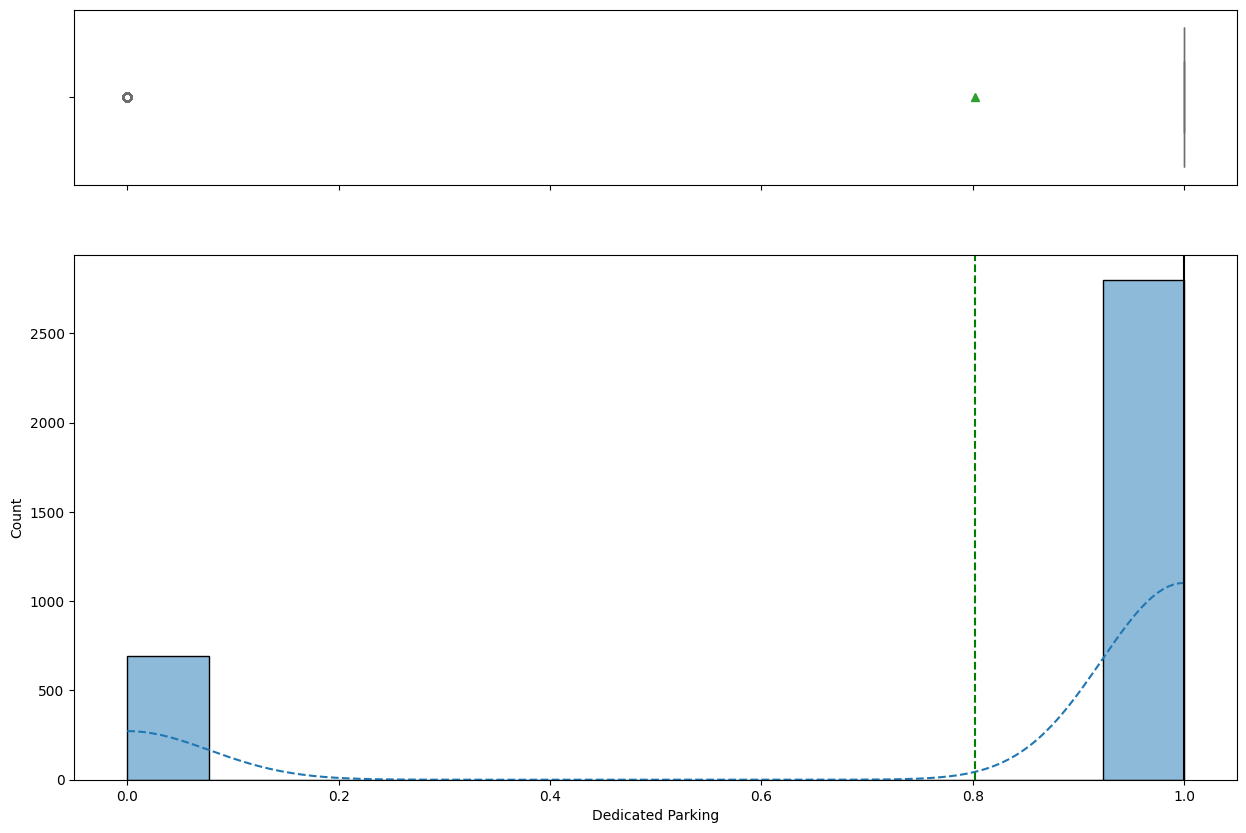

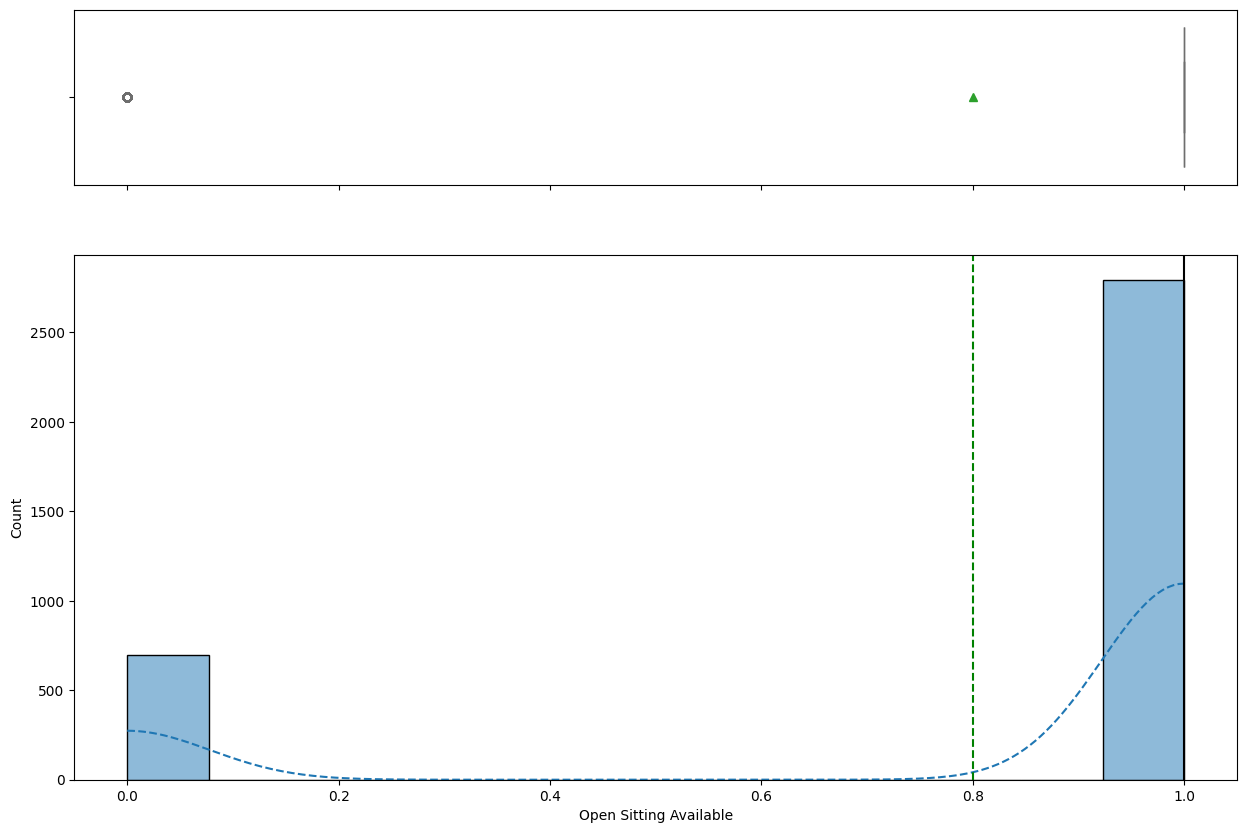

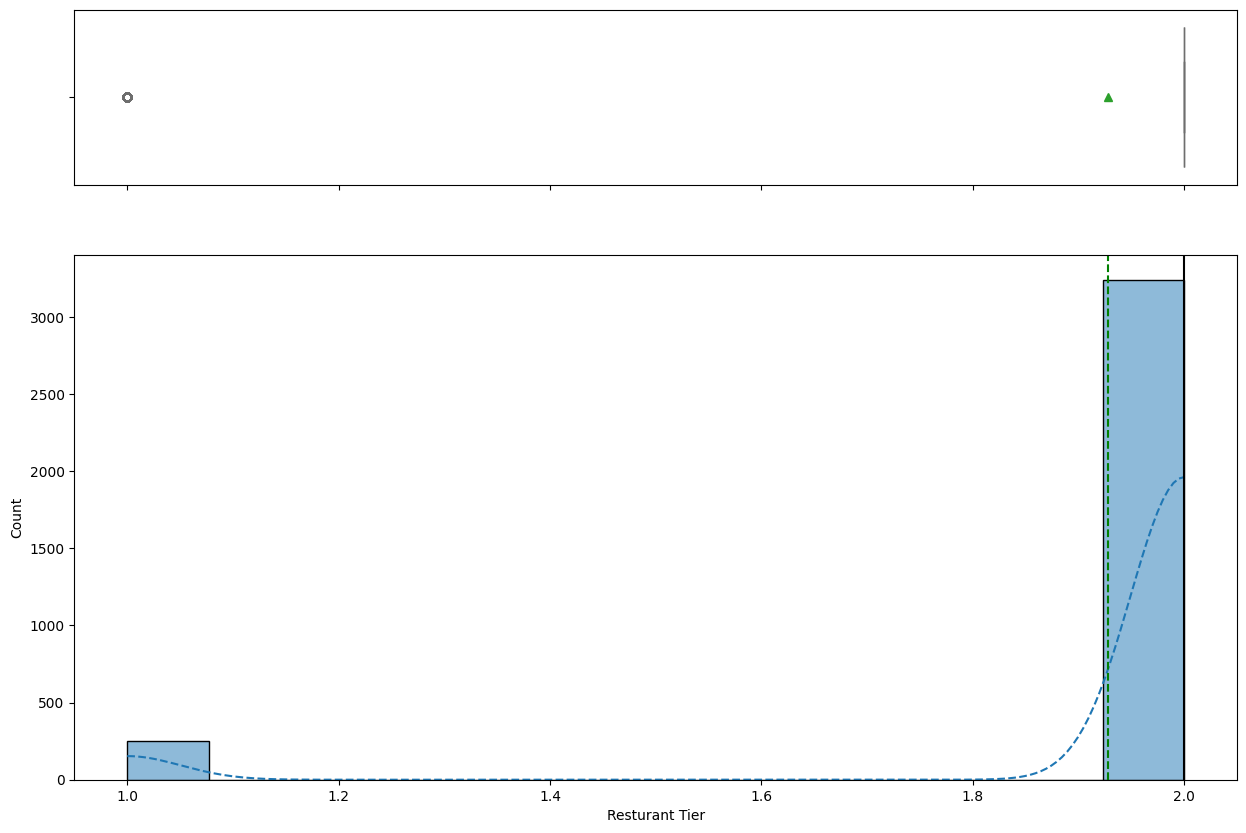

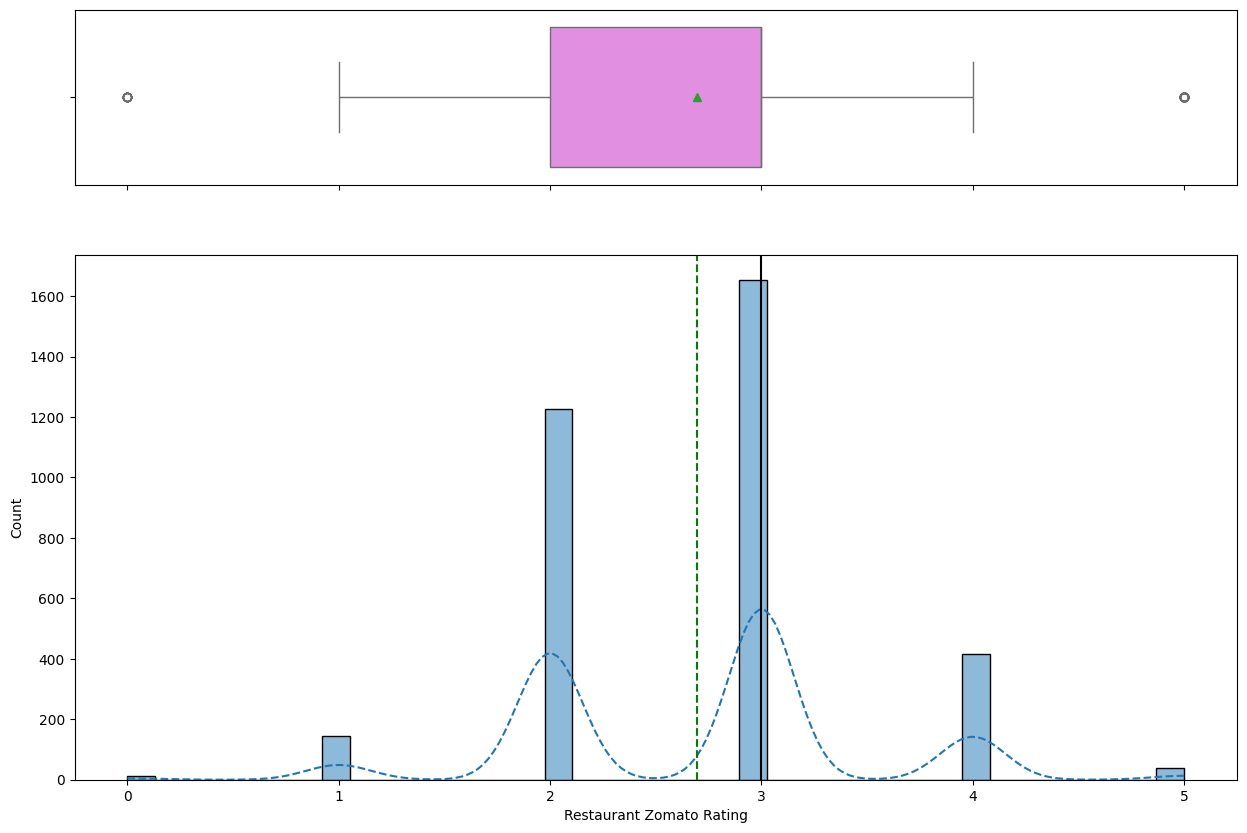

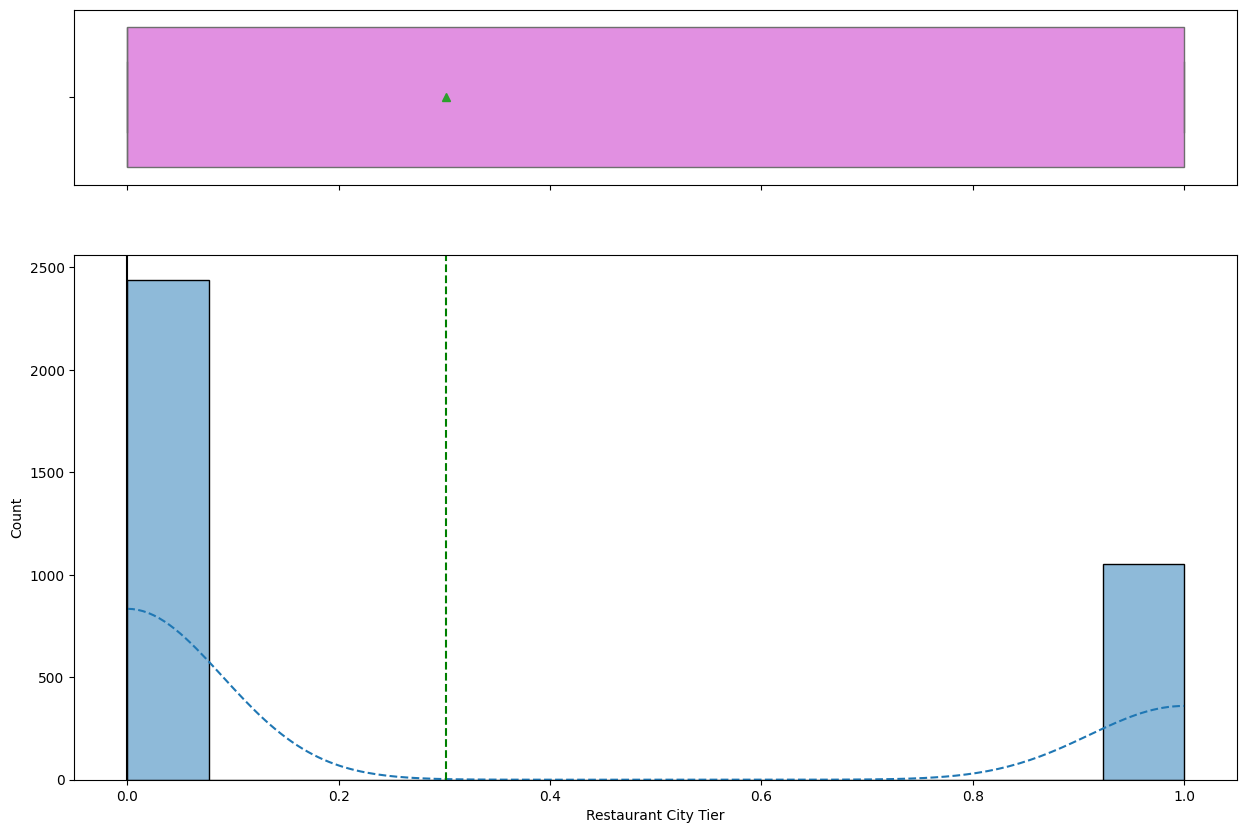

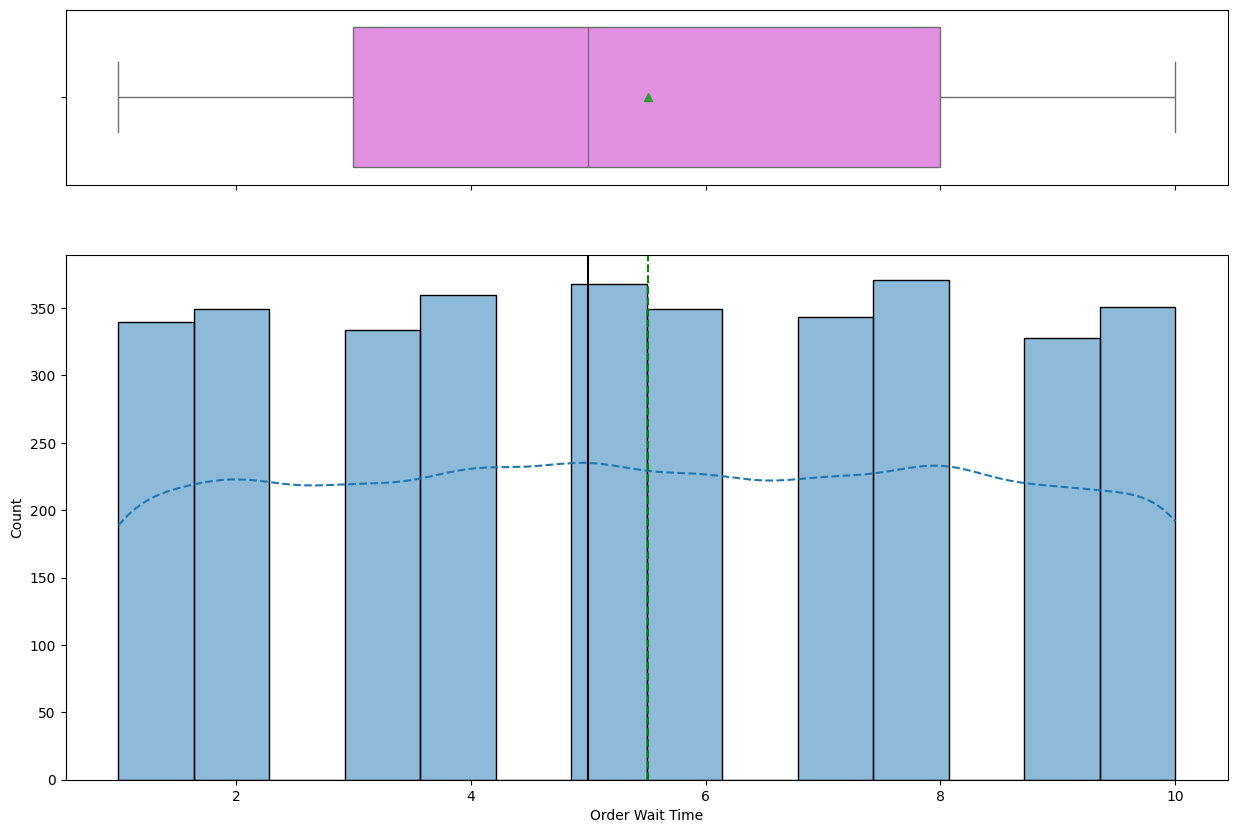

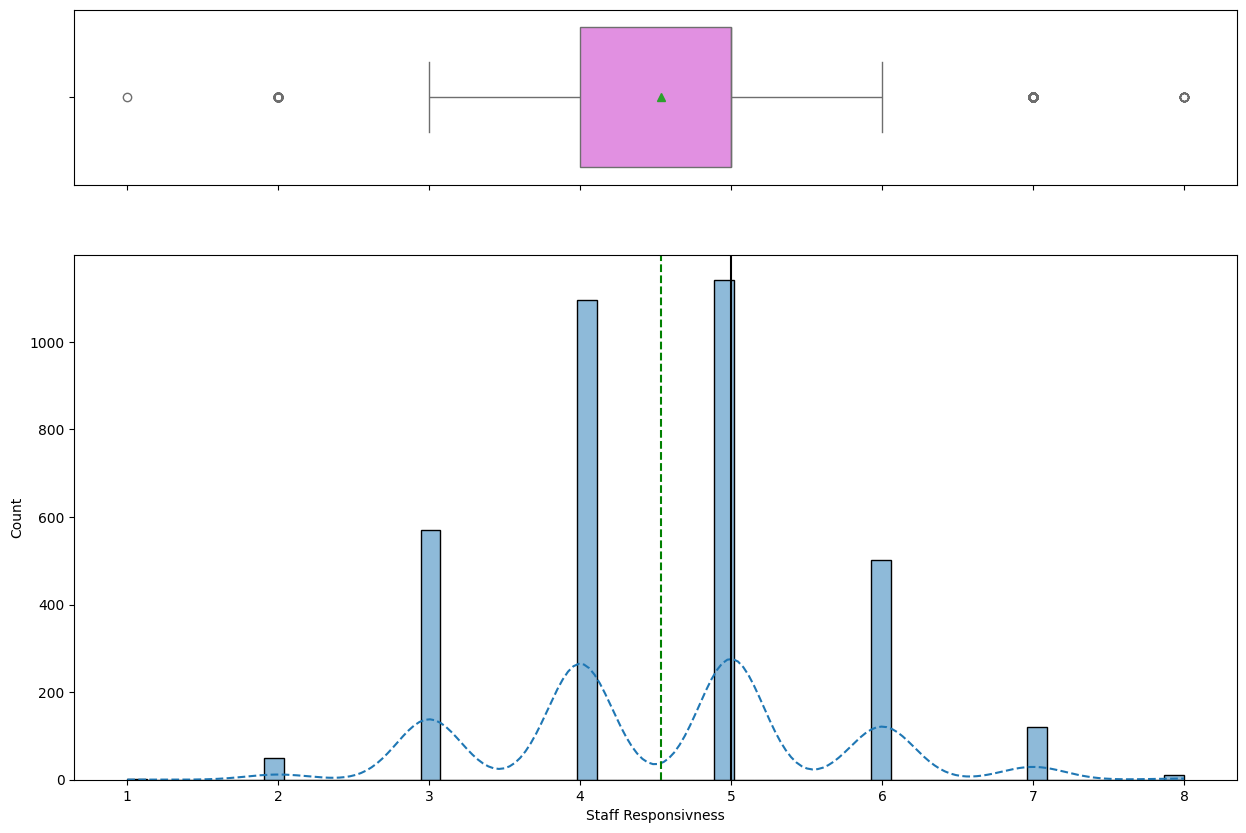

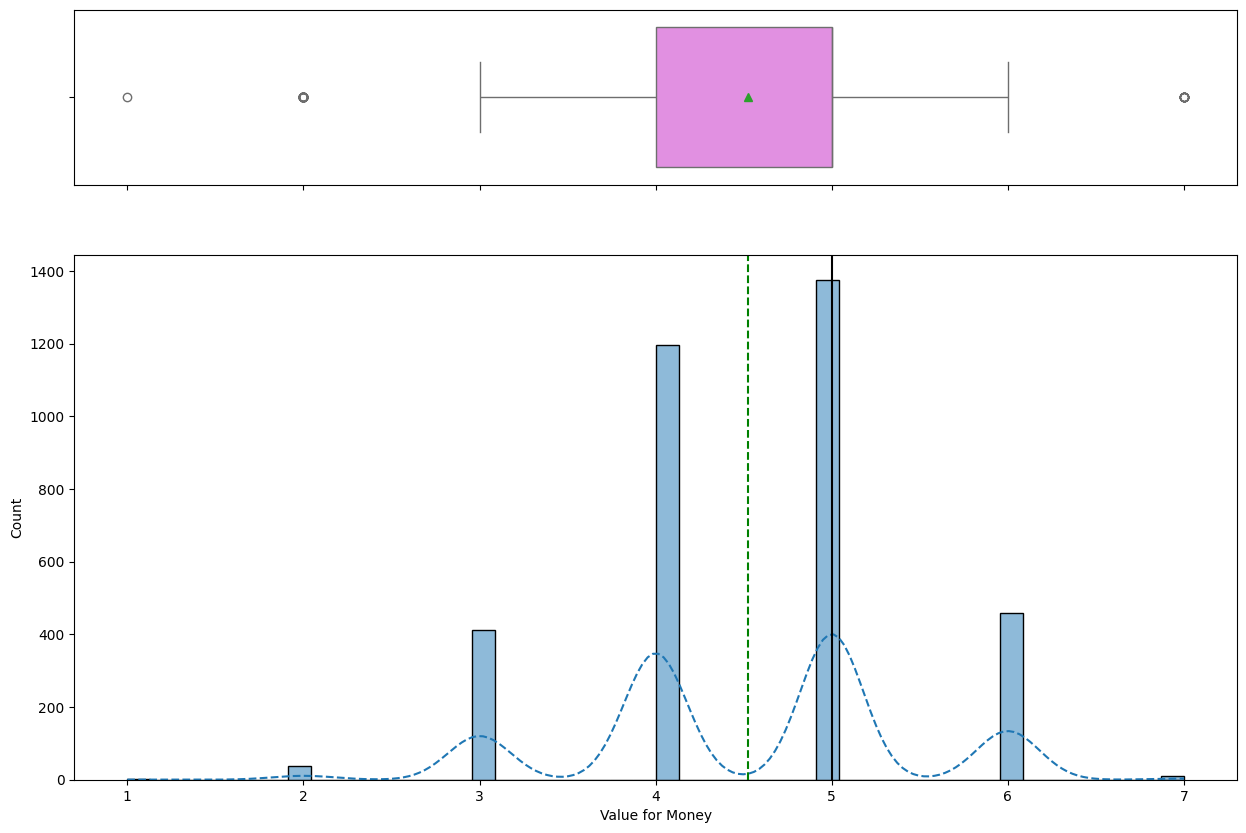

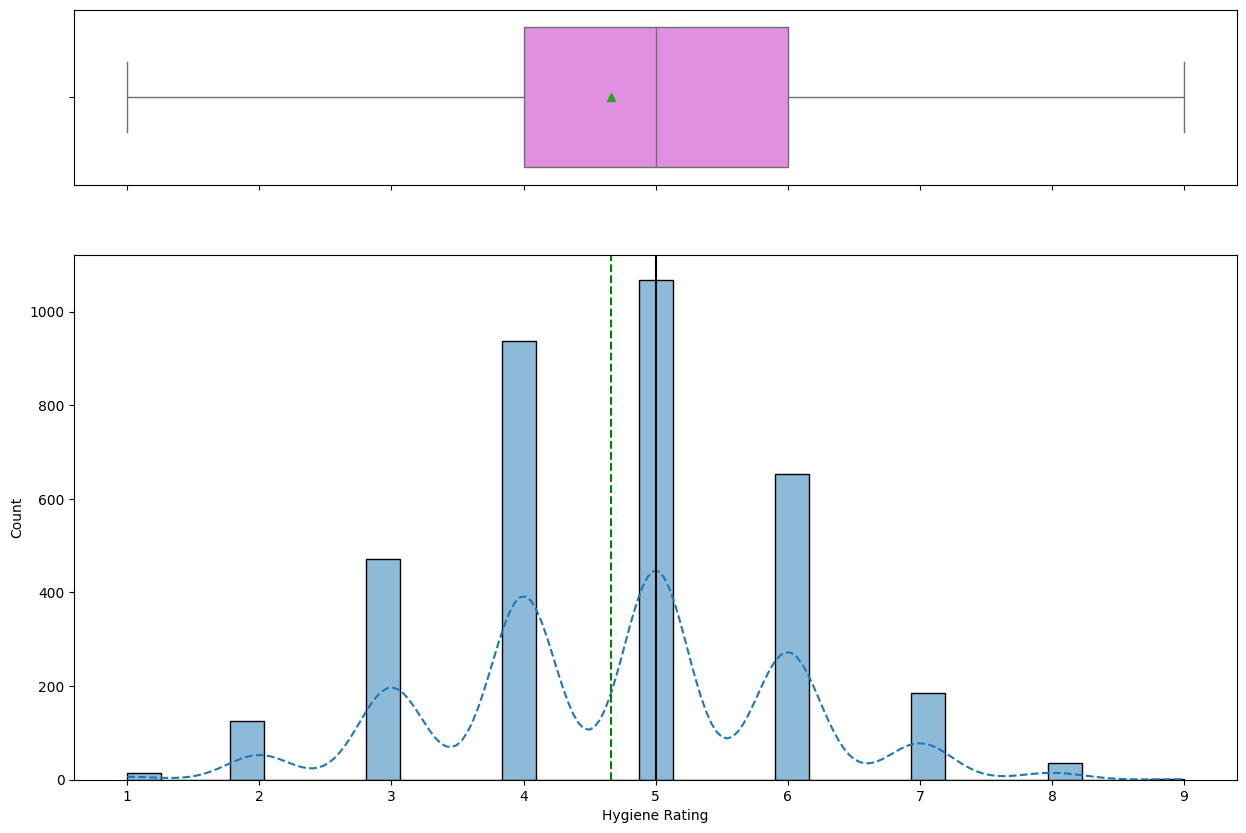

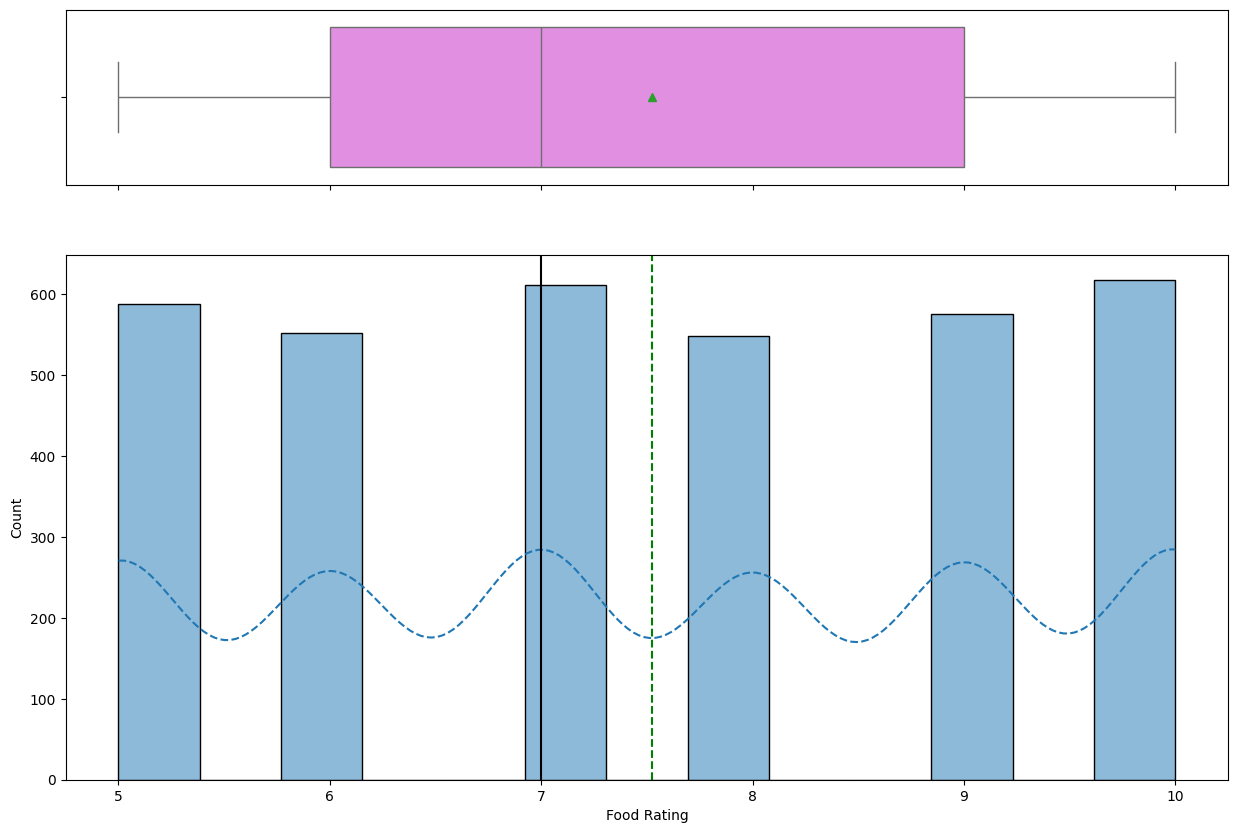

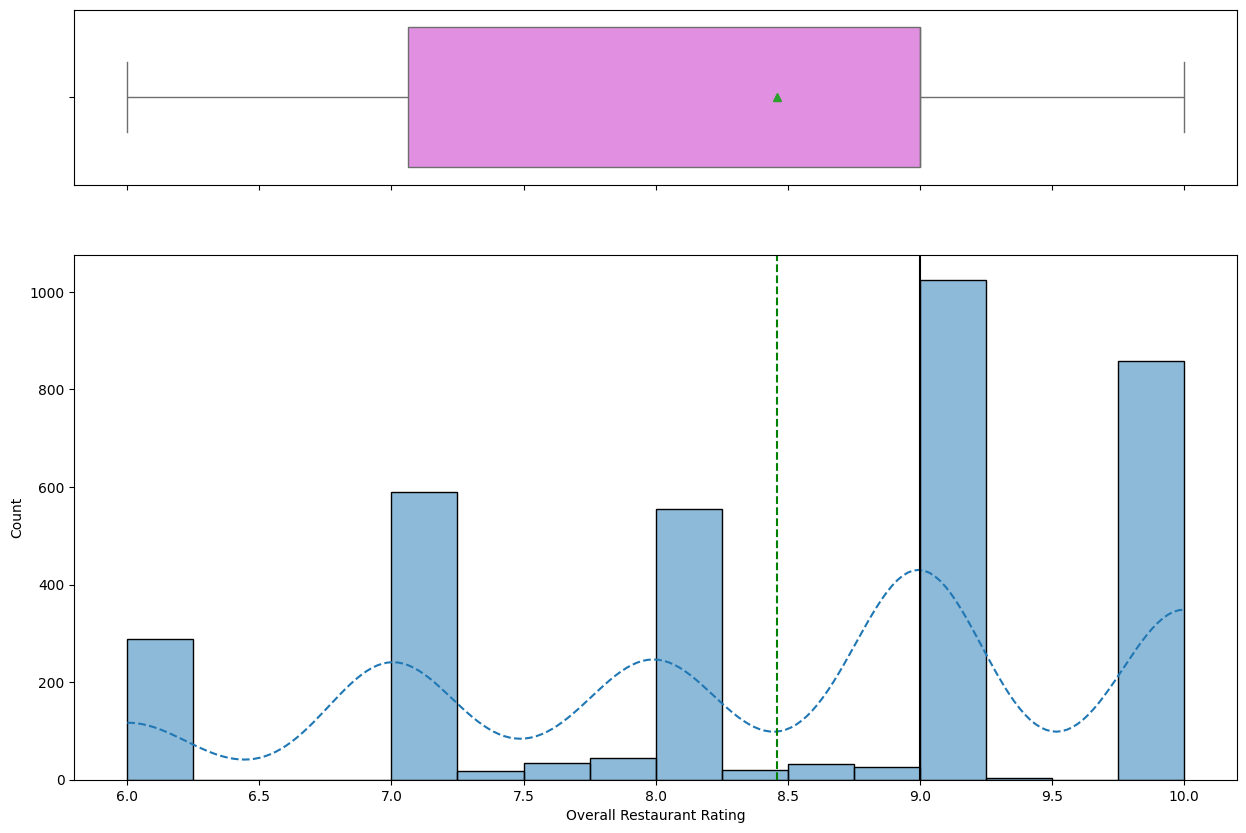

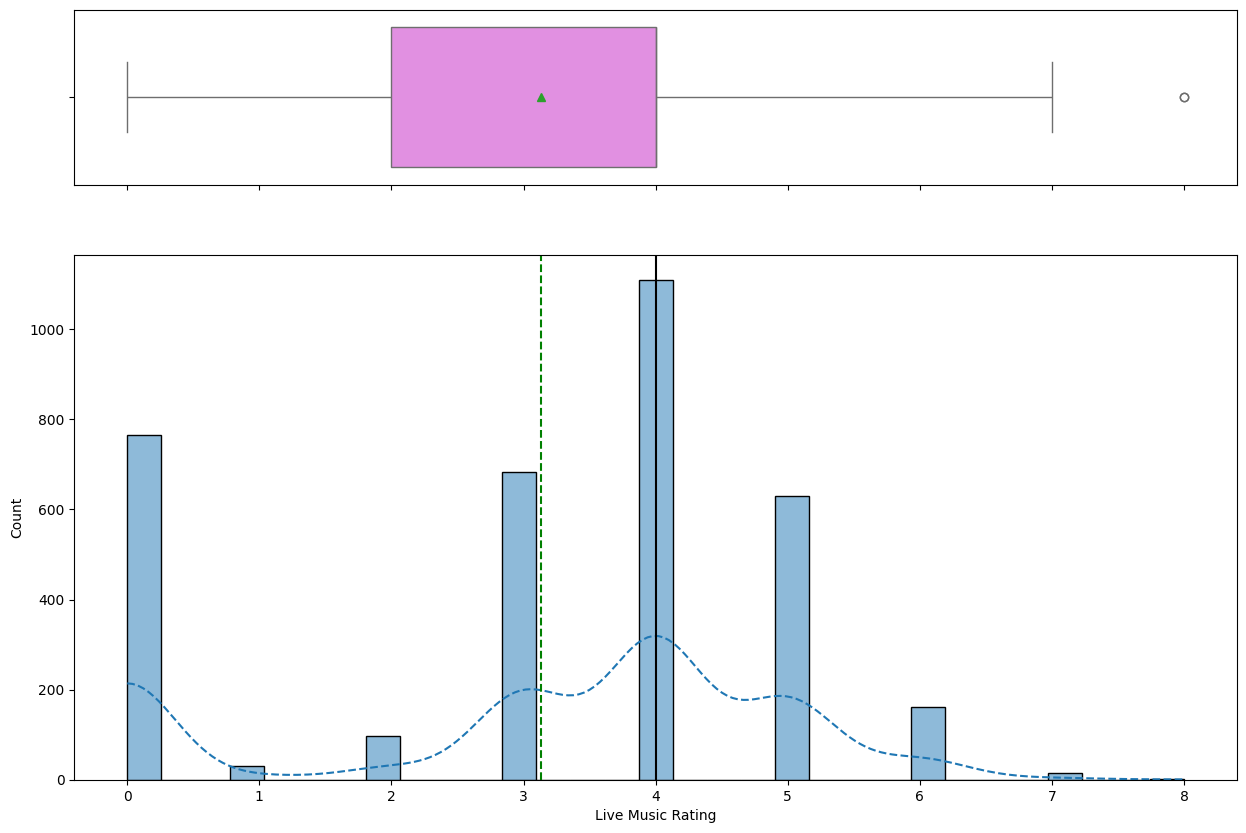

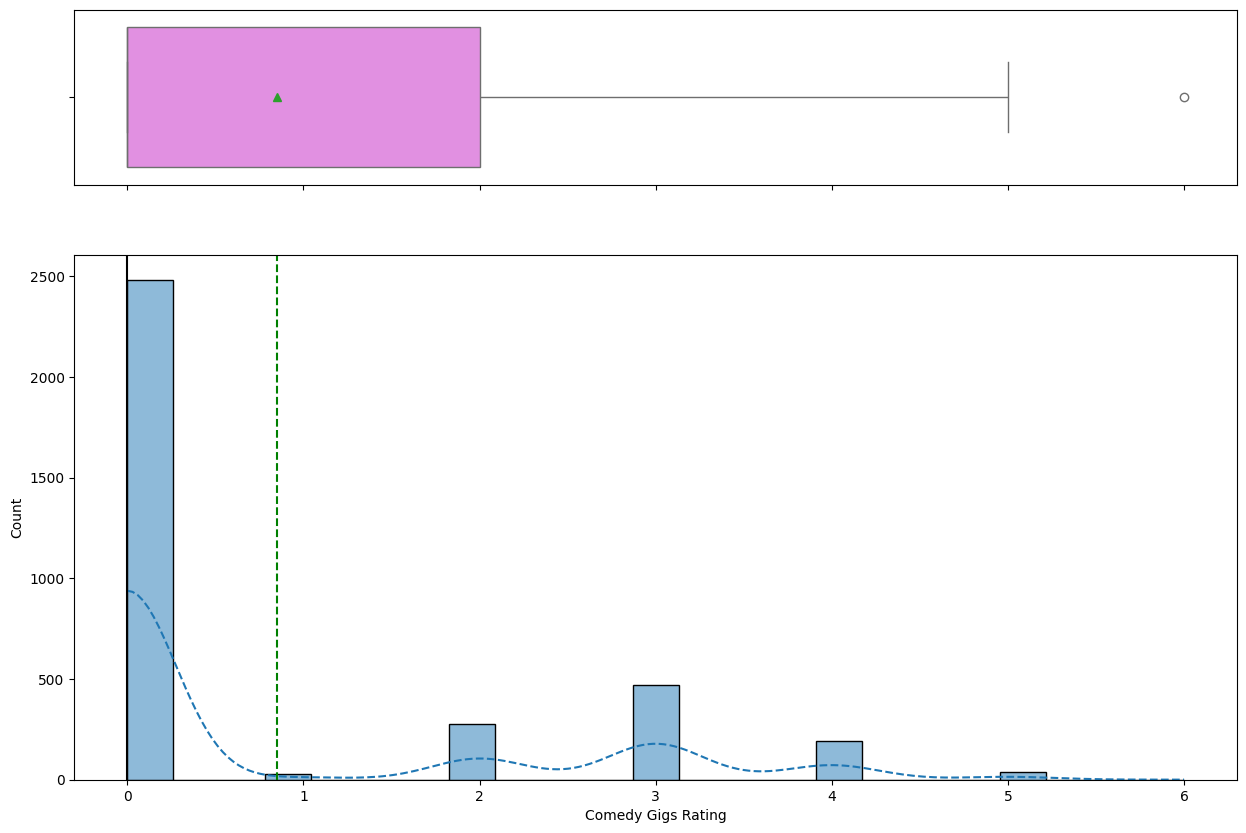

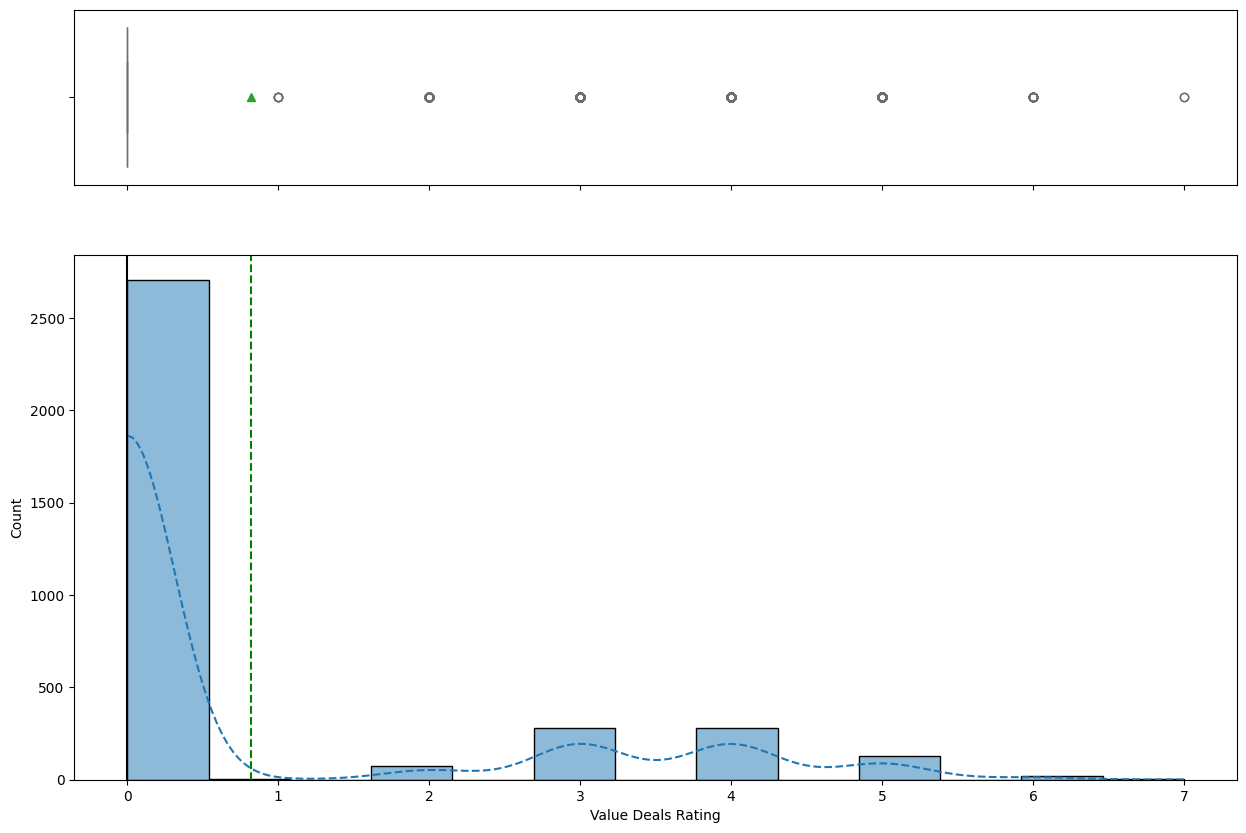

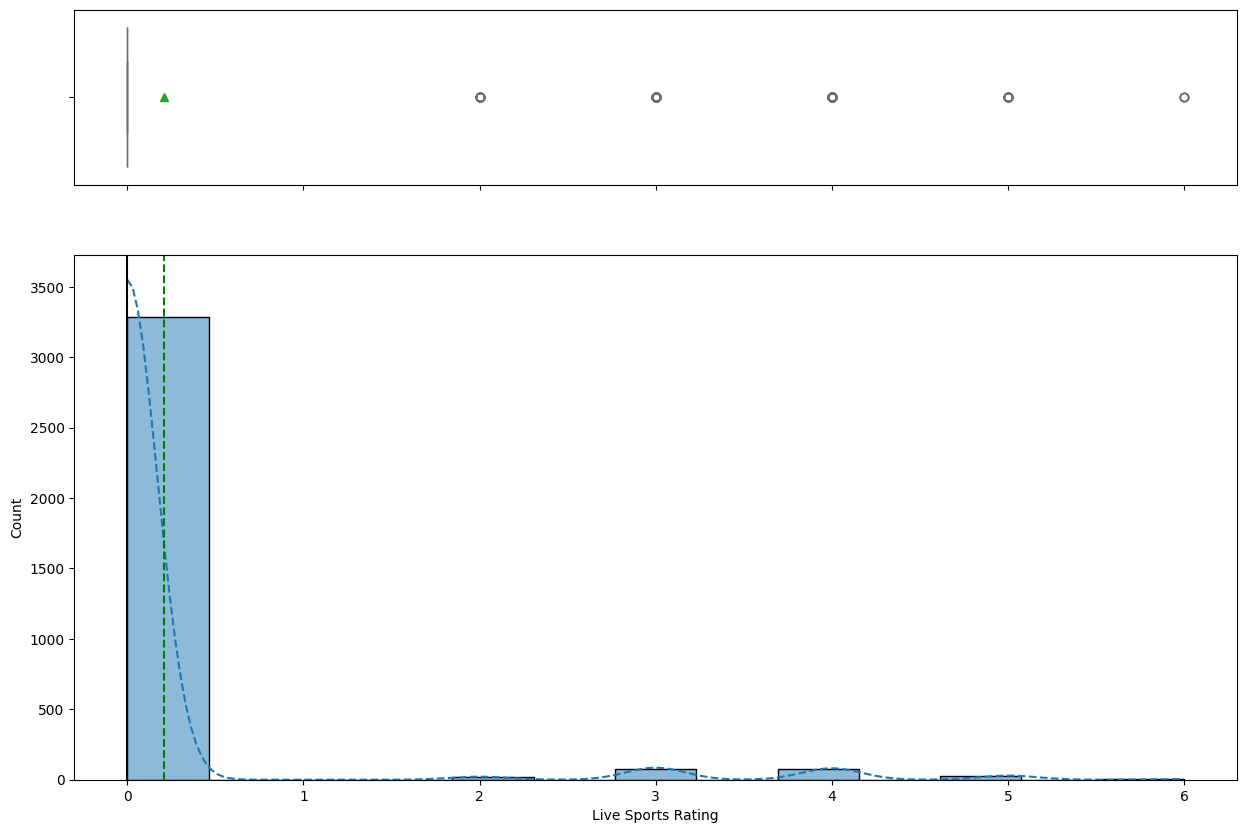

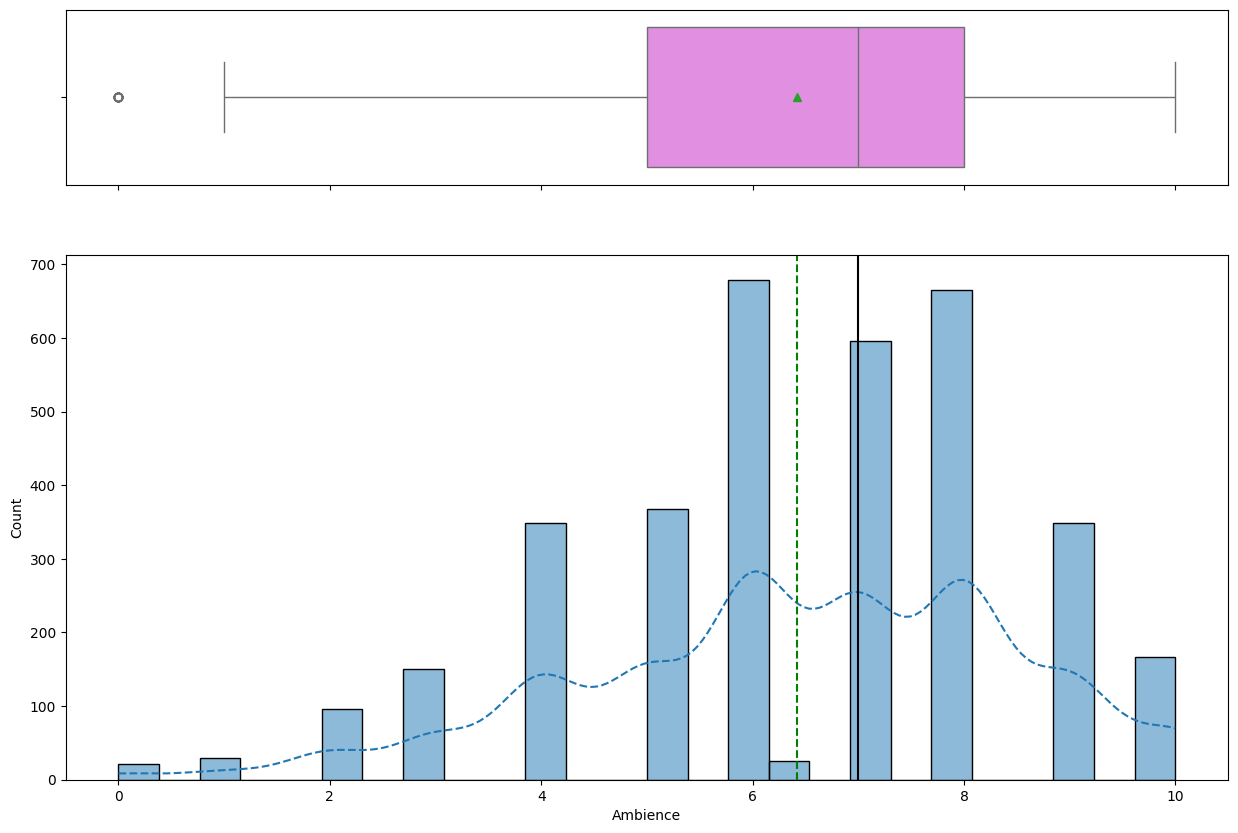

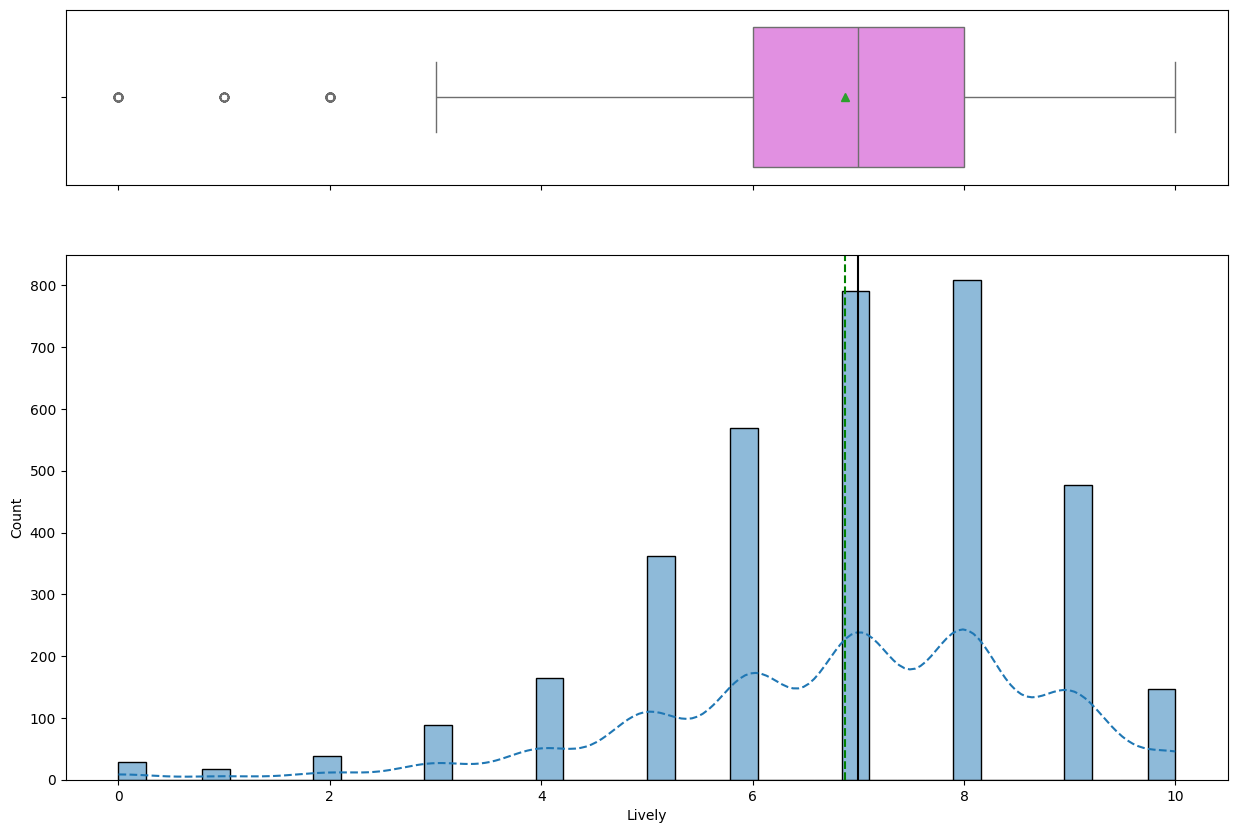

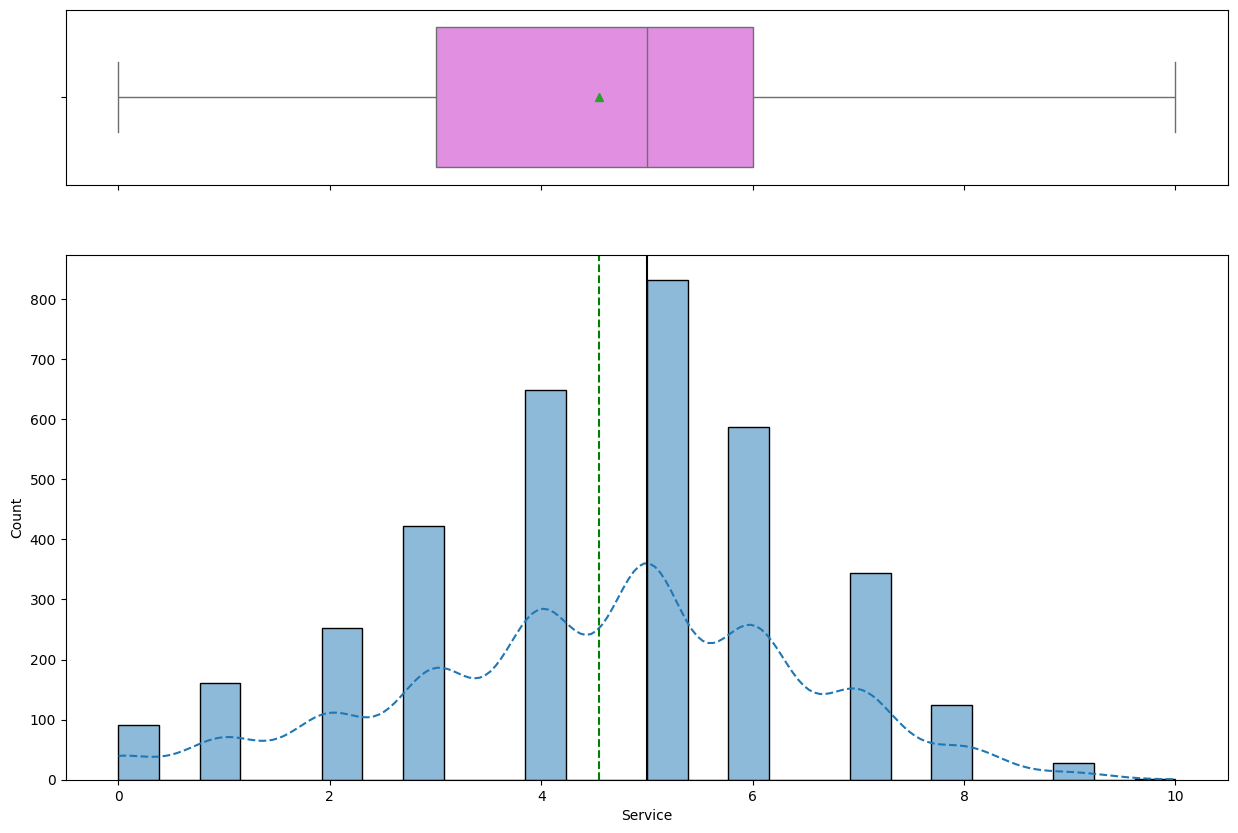

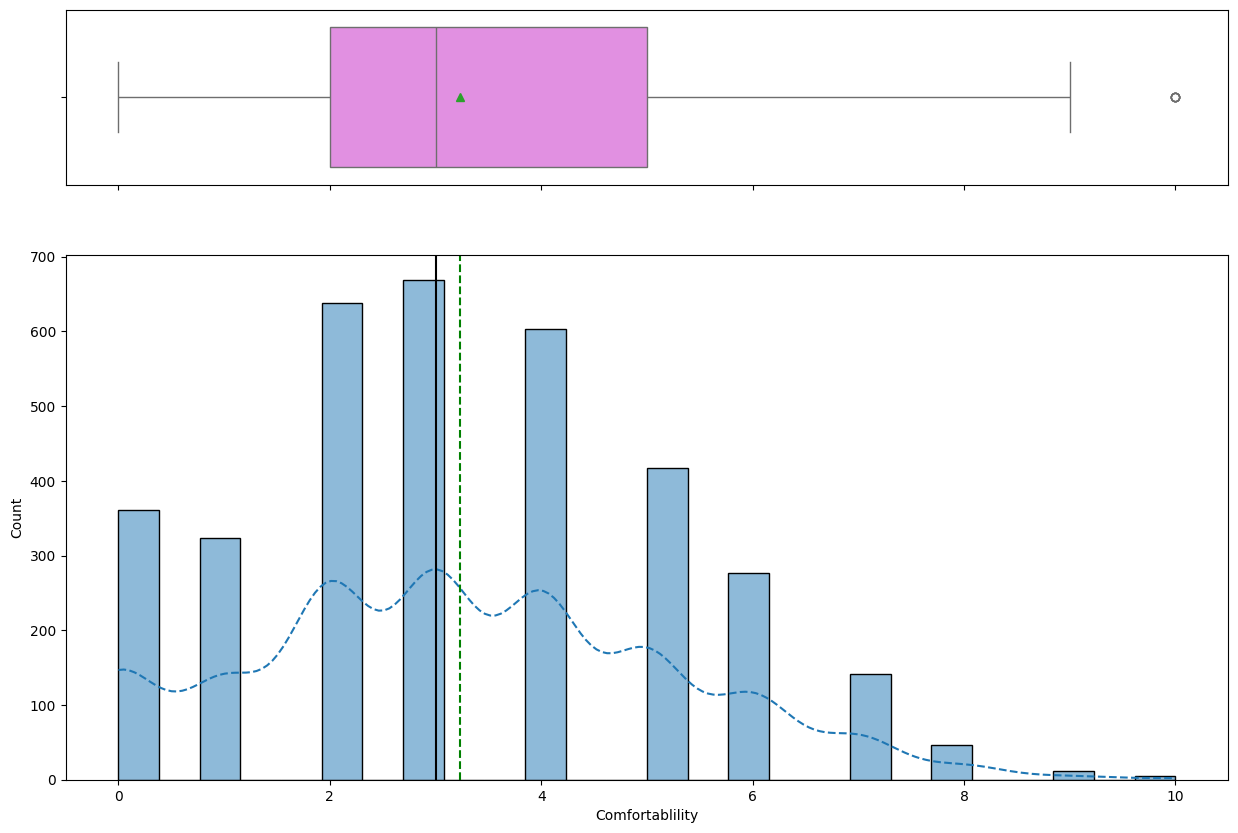

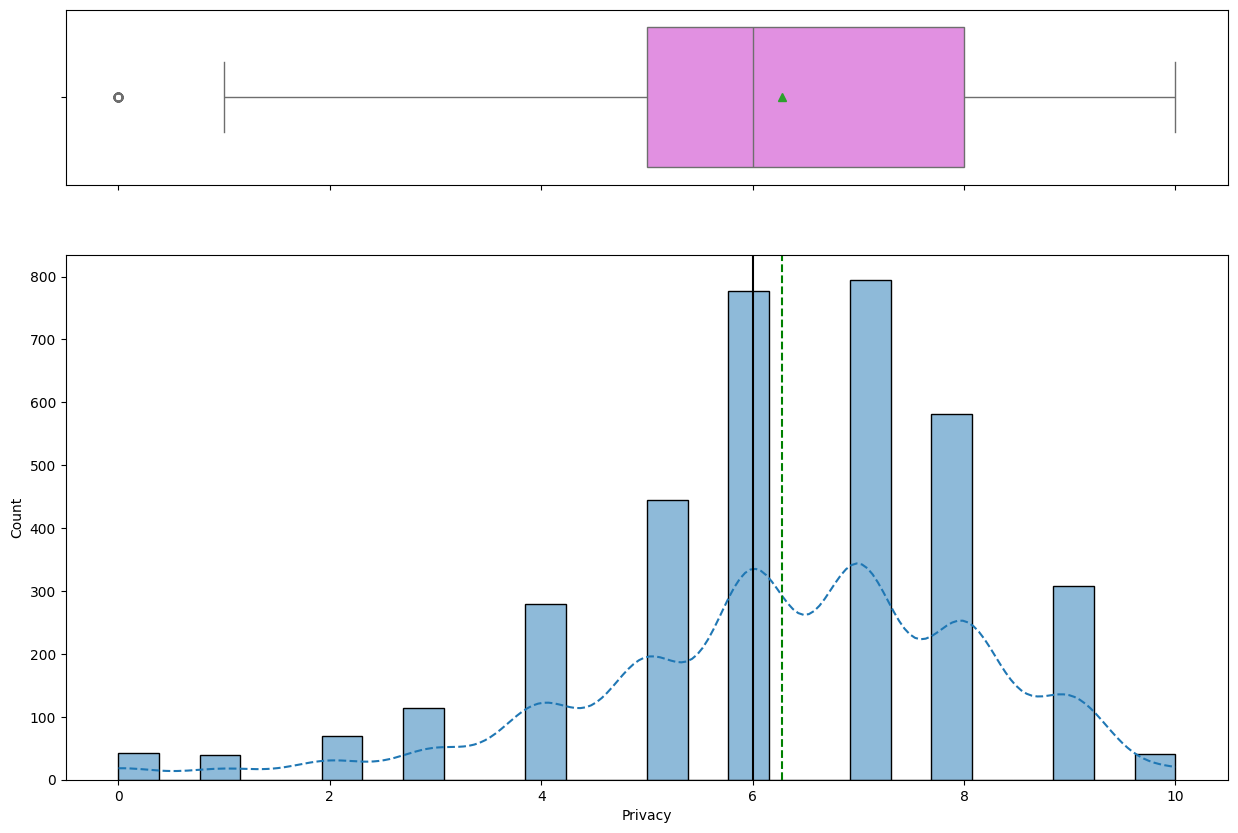

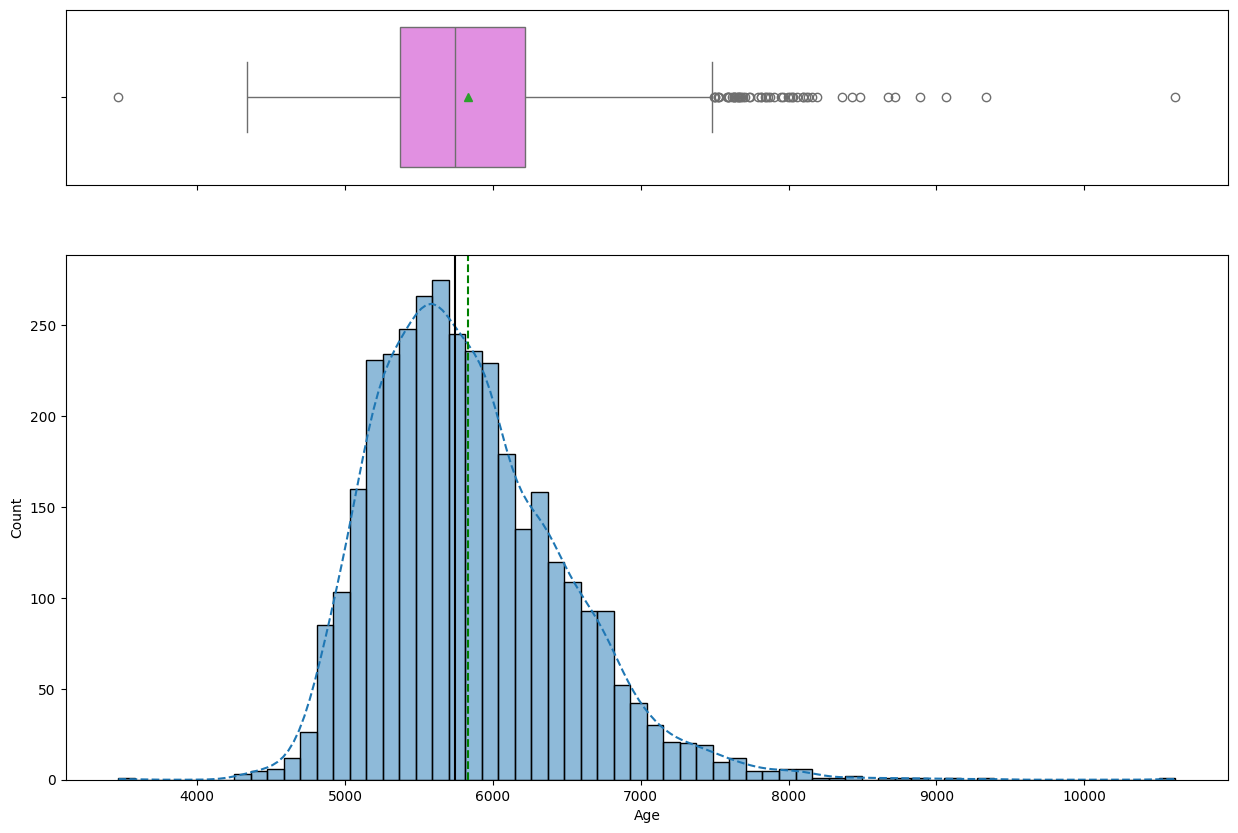

In [40]:
for i in numeric_cols:
  histogram_boxplot(data,i)

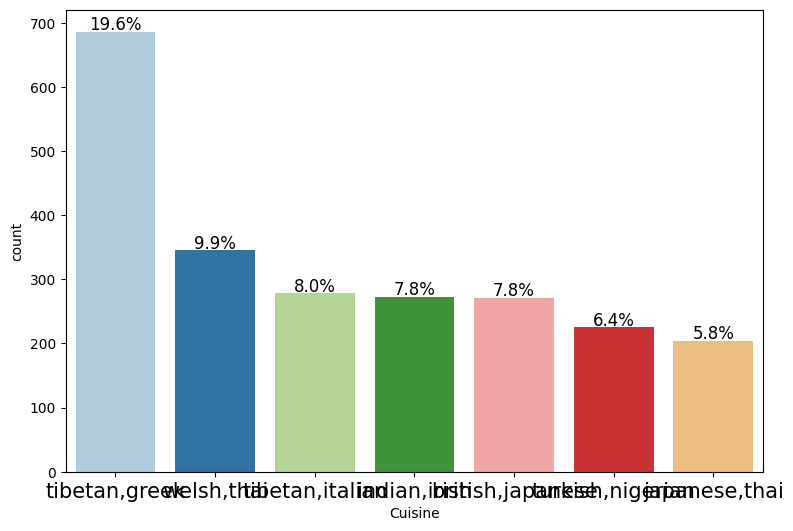

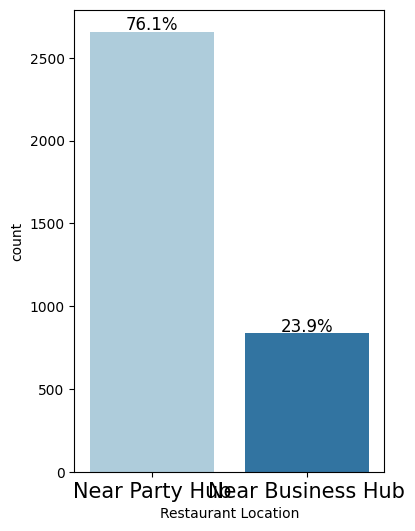

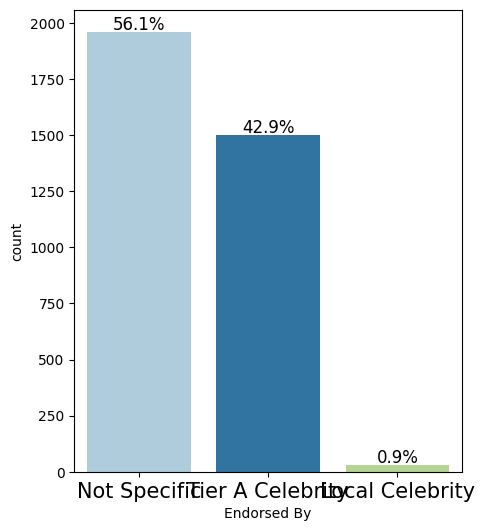

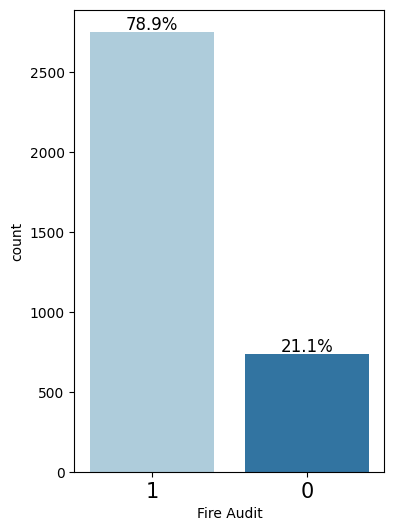

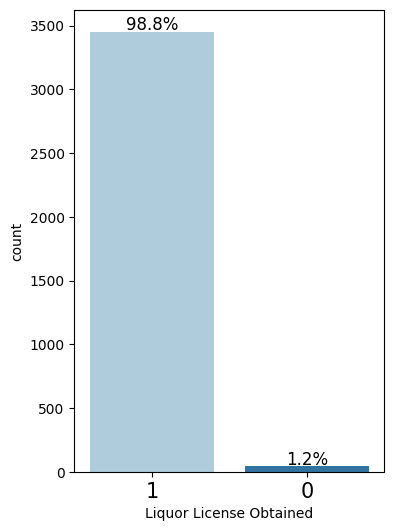

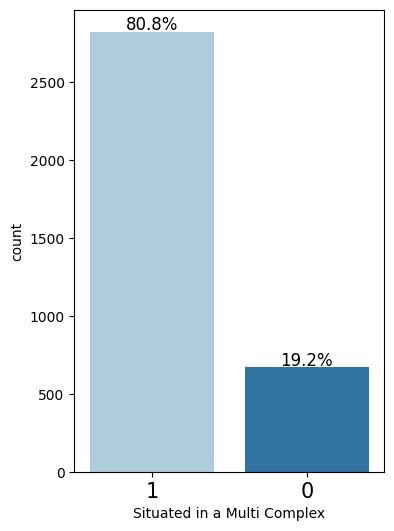

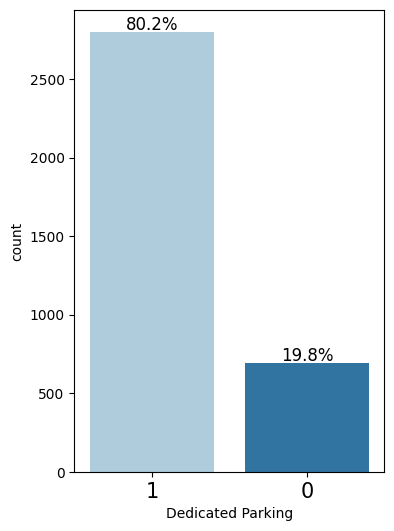

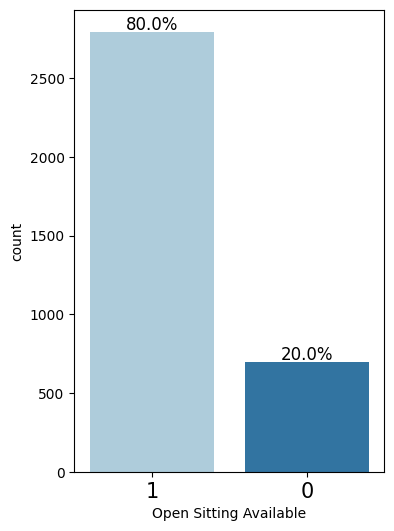

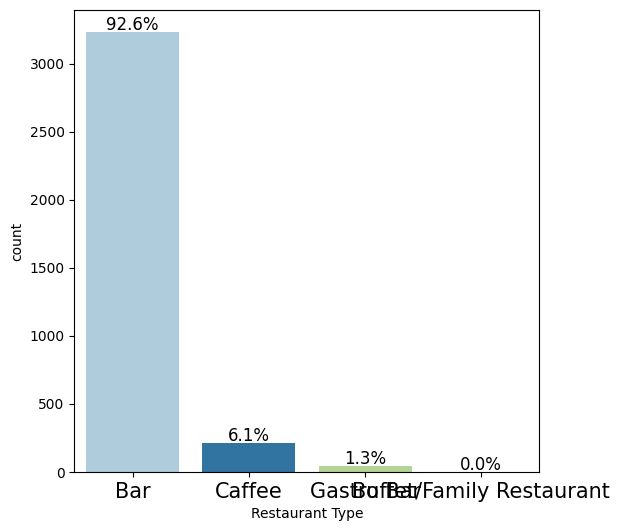

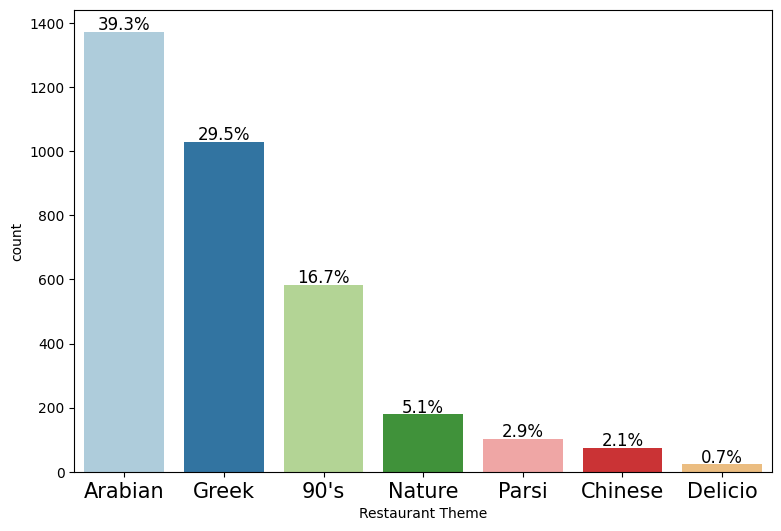

In [36]:
#Convert all features that should have been categorical to categorical
cat_features=['Cuisine','Restaurant Location','Endorsed By','Fire Audit','Liquor License Obtained','Situated in a Multi Complex','Dedicated Parking','Open Sitting Available','Restaurant Type','Restaurant Theme']
for feature in cat_features:
    data[feature]=data[feature].astype('category')

cat_data=data.select_dtypes(include='category')
for feature in cat_data.columns:
    labeled_barplot(data,feature,perc=True)

In [37]:
#DRop city column as same info is available in city_tier
data.drop(['City'],axis=1,inplace=True)

KeyboardInterrupt: 

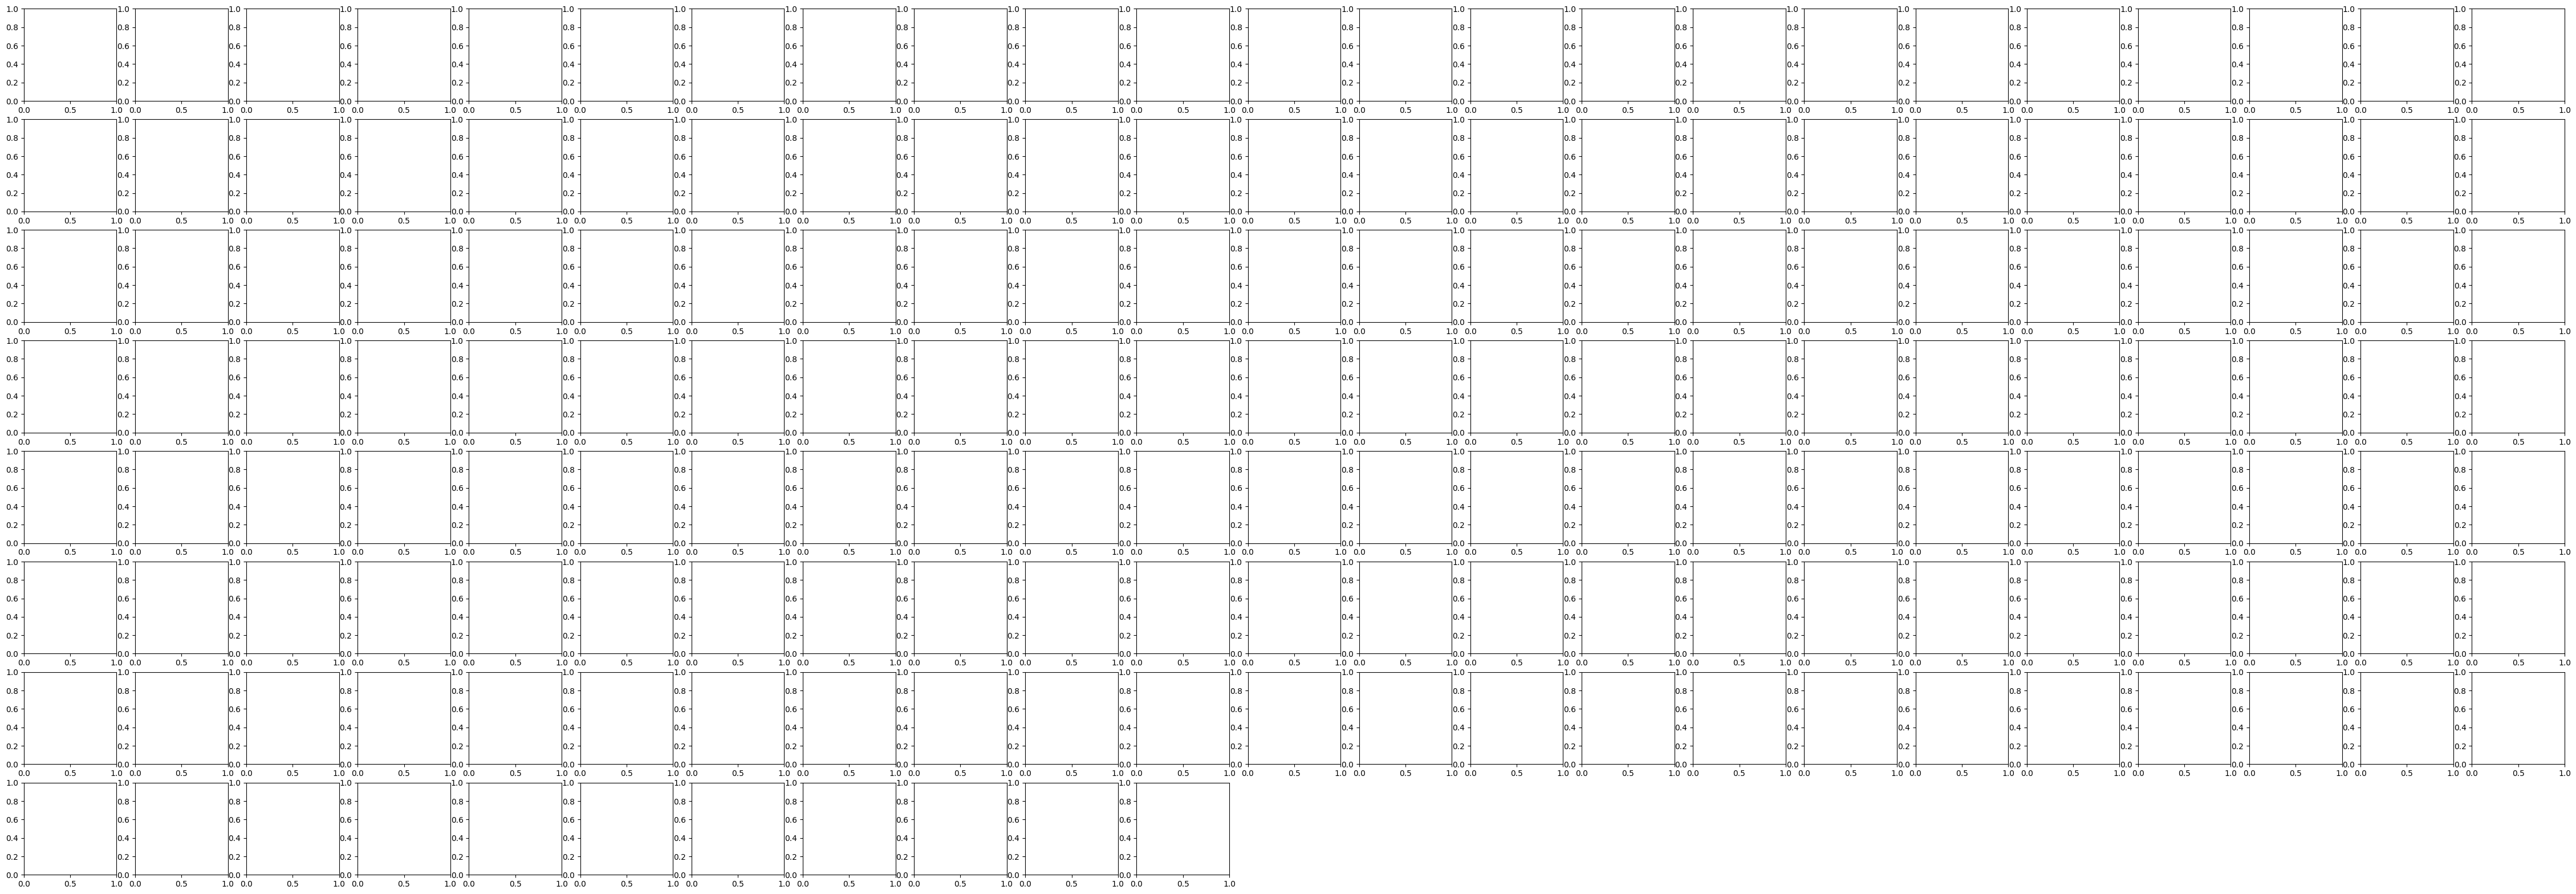

In [43]:
#Plot pairplot
sns.pairplot(data)

In [38]:
#increase fig size to 15, 10 to accommodate higher number of variables
plt.figure(figsize=(15,10))
data_corr=data.select_dtypes(include='number').corr()
print(data_corr)

                               Registration Number  Annual Turnover  \
Registration Number                       1.000000        -0.016768   
Annual Turnover                          -0.016768         1.000000   
Facebook Popularity Quotient             -0.005460         0.164100   
Instagram Popularity Quotient             0.023598         0.166093   
Resturant Tier                            0.006425        -0.178771   
Restaurant Zomato Rating                  0.002079         0.126454   
Restaurant City Tier                     -0.012190         0.009952   
Order Wait Time                          -0.018315         0.005916   
Staff Responsivness                      -0.018243         0.156468   
Value for Money                          -0.019002         0.162881   
Hygiene Rating                            0.010949         0.213869   
Food Rating                               0.002481         0.000302   
Overall Restaurant Rating                -0.013911         0.118360   
Live M

<Figure size 1500x1000 with 0 Axes>

In [39]:
#drop city as a name from cat_features
#cat_features.remove('City')
data.drop('Registration Number',axis=1,inplace=True)
#convert categorical variables to dummy variables
X_dummy=pd.get_dummies(data,columns=cat_features,drop_first=True)
X_dummy.head()

,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age,"Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",Restaurant Location_Near Party Hub,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Fire Audit_1,Liquor License Obtained_1,Situated in a Multi Complex_1,Dedicated Parking_1,Open Sitting Available_1,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_Ambiance,Restaurant Theme_Arabian,Restaurant Theme_Bakery,Restaurant Theme_Belise,Restaurant Theme_Benedicta,Restaurant Theme_Bettaso,Restaurant Theme_Cafepro,Restaurant Theme_Carbone,Restaurant Theme_Chinese,Restaurant Theme_Cinnamon,Restaurant Theme_Delicio,Restaurant Theme_Downtown,Restaurant Theme_English,Restaurant Theme_Flavors,Restaurant Theme_Grand,Restaurant Theme_Greek,Restaurant Theme_Italica,Restaurant Theme_LaCuisine,Restaurant Theme_Marco,Restaurant Theme_Mise En,Restaurant Theme_Molino,Restaurant Theme_Moonrise,Restaurant Theme_Nature,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante,Restaurant Theme_Piquant,Restaurant Theme_Resca,Restaurant Theme_Sage,Restaurant Theme_Savory,Restaurant Theme_Spoon,Restaurant Theme_TheGem,Restaurant Theme_Umami
0,42000000,84.300000,95.8,2.0,3,0,2,5,5,5,7,10.0,4.0,0.0,0.0,0.0,8.00000,8,6,6,6,6122,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,50000000,85.400000,85.0,2.0,3,0,6,6,6,7,8,9.0,0.0,4.0,0.0,0.0,5.00000,7,7,3,8,6260,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,32500000,85.000000,68.2,2.0,3,0,2,6,5,3,7,8.0,3.0,0.0,0.0,0.0,7.00000,10,5,2,8,5226,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,110000000,85.600000,83.6,1.0,3,1,7,6,5,6,8,9.0,6.0,0.0,0.0,0.0,7.00000,7,4,3,5,6198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000000,79.341665,76.8,2.0,3,0,10,5,6,4,8,6.0,0.0,2.0,0.0,0.0,6.42301,6,2,4,6,5749,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,Tru

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Annual Turnover                3493 non-null   int64   
 1   Cuisine                        3493 non-null   category
 2   Restaurant Location            3493 non-null   category
 3   Facebook Popularity Quotient   3493 non-null   float64 
 4   Endorsed By                    3493 non-null   category
 5   Instagram Popularity Quotient  3493 non-null   float64 
 6   Fire Audit                     3493 non-null   category
 7   Liquor License Obtained        3493 non-null   category
 8   Situated in a Multi Complex    3493 non-null   category
 9   Dedicated Parking              3493 non-null   category
 10  Open Sitting Available         3493 non-null   category
 11  Resturant Tier                 3493 non-null   float64 
 12  Restaurant Type                349

In [41]:
X_dummy=pd.get_dummies(data,columns=cat_features,drop_first=True)
X_dummy_train=X_dummy.drop(['Annual Turnover'],axis=1)
y_dummy_train=pd.DataFrame(X_dummy['Annual Turnover'])
X_dummy_train.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age,"Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",Restaurant Location_Near Party Hub,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Fire Audit_1,Liquor License Obtained_1,Situated in a Multi Complex_1,Dedicated Parking_1,Open Sitting Available_1,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_Ambiance,Restaurant Theme_Arabian,Restaurant Theme_Bakery,Restaurant Theme_Belise,Restaurant Theme_Benedicta,Restaurant Theme_Bettaso,Restaurant Theme_Cafepro,Restaurant Theme_Carbone,Restaurant Theme_Chinese,Restaurant Theme_Cinnamon,Restaurant Theme_Delicio,Restaurant Theme_Downtown,Restaurant Theme_English,Restaurant Theme_Flavors,Restaurant Theme_Grand,Restaurant Theme_Greek,Restaurant Theme_Italica,Restaurant Theme_LaCuisine,Restaurant Theme_Marco,Restaurant Theme_Mise En,Restaurant Theme_Molino,Restaurant Theme_Moonrise,Restaurant Theme_Nature,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante,Restaurant Theme_Piquant,Restaurant Theme_Resca,Restaurant Theme_Sage,Restaurant Theme_Savory,Restaurant Theme_Spoon,Restaurant Theme_TheGem,Restaurant Theme_Umami
0,84.300000,95.8,2.0,3,0,2,5,5,5,7,10.0,4.0,0.0,0.0,0.0,8.00000,8,6,6,6,6122,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,85.400000,85.0,2.0,3,0,6,6,6,7,8,9.0,0.0,4.0,0.0,0.0,5.00000,7,7,3,8,6260,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,85.000000,68.2,2.0,3,0,2,6,5,3,7,8.0,3.0,0.0,0.0,0.0,7.00000,10,5,2,8,5226,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,85.600000,83.6,1.0,3,1,7,6,5,6,8,9.0,6.0,0.0,0.0,0.0,7.00000,7,4,3,5,6198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,79.341665,76.8,2.0,3,0,10,5,6,4,8,6.0,0.0,2.0,0.0,0.0,6.42301,6,2,4,6,5749,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,False,False,False,False,False,False,False,Fal

In [42]:
X_dummy.columns

Index(['Annual Turnover', 'Facebook Popularity Quotient',
       'Instagram Popularity Quotient', 'Resturant Tier',
       'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time',
       'Staff Responsivness', 'Value for Money', 'Hygiene Rating',
       'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating',
       'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating',
       'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy', 'Age',
       'Cuisine_algerian,belgian', 'Cuisine_algerian,korean',
       'Cuisine_british,belgian', 'Cuisine_british,japanese',
       'Cuisine_chinese,salvadorian', 'Cuisine_cuban,british',
       'Cuisine_hawaiian,latvian', 'Cuisine_indian,irish',
       'Cuisine_irish,belgian', 'Cuisine_japanese,thai',
       'Cuisine_nigerian,cajun', 'Cuisine_peruvian,cuban',
       'Cuisine_polish,jewish', 'Cuisine_swedish,greek',
       'Cuisine_tibetan,greek', 'Cuisine_tibetan,italian',
       'Cuisine_turkish,nigerian', 'Cui

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X_dummy_train,y_dummy_train,test_size=0.2, random_state=42)

In [44]:
    # Clean column names in X_dummy by replacing spaces and commas with underscores
    X_dummy.columns = X_dummy.columns.str.replace(' ', '_').str.replace(',', '_').str.replace('/','_')
    # Also clean column names in X_dummy_train for consistency if it's used elsewhere or for clarity
    X_dummy_train.columns = X_dummy_train.columns.str.replace(' ', '_').str.replace(',', '_').str.replace('/','_')
    y_dummy_train.columns = y_dummy_train.columns.str.replace(' ', '_').str.replace(',', '_').str.replace('/','_')
    X_train,X_test,y_train,y_test=train_test_split(X_dummy_train,y_dummy_train,test_size=0.2, random_state=42)
    # The target column 'Annual Turnover' will also be renamed to 'Annual_Turnover'
    target_col_name = 'Annual_Turnover'

    # Get the list of predictor columns after cleaning
    #predictor_cols_for_formula = [col for col in X_train]
    predictor_cols_for_formula = [col for col in X_dummy_train]
    #print(predictor_cols)
    dataLR=pd.concat([y_dummy_train,X_dummy_train],axis=1)
    #dataLR.head()
    # Construct the formula using the cleaned predictor names directly
    formula = str('Annual_Turnover ~ ' + ' + '.join(predictor_cols_for_formula))
    #print(formula)
    model = smf.ols(formula=formula, data=dataLR).fit()

###KMeans

In [51]:
X_dummy_train=X_dummy_train.astype(float)

In [103]:
# scaling the data before clustering
scaler = StandardScaler()
subset = X_dummy_train.copy()
subset_scaled = scaler.fit_transform(subset)

In [104]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
print(subset_scaled_df.head())

   Facebook_Popularity_Quotient  Instagram_Popularity_Quotient  \
0                      0.648456                       1.921411   
1                      0.761410                       0.949706   
2                      0.720336                      -0.561835   
3                      0.781948                       0.823744   
4                      0.139304                       0.211930   

   Resturant_Tier  Restaurant_Zomato_Rating  Restaurant_City_Tier  \
0        0.279439                  0.385518             -0.656930   
1        0.279439                  0.385518             -0.656930   
2        0.279439                  0.385518             -0.656930   
3       -3.578592                  0.385518              1.522232   
4        0.279439                  0.385518             -0.656930   

   Staff_Responsivness  Value_for_Money  Hygiene_Rating  \
0             0.421966         0.518183        0.268477   
1             1.336314         1.612507        1.856608   
2          

In [54]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions

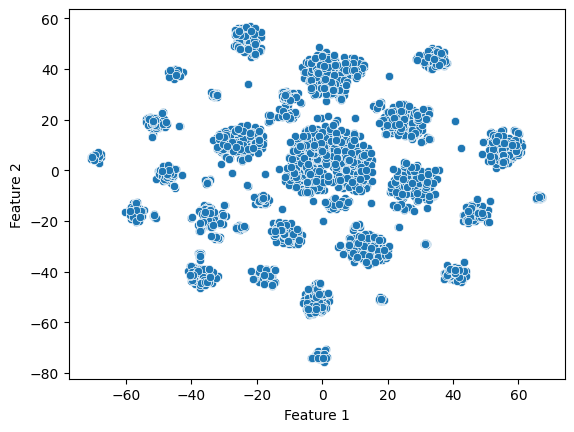

In [54]:
#plot the scattergraph of the two features
sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2");

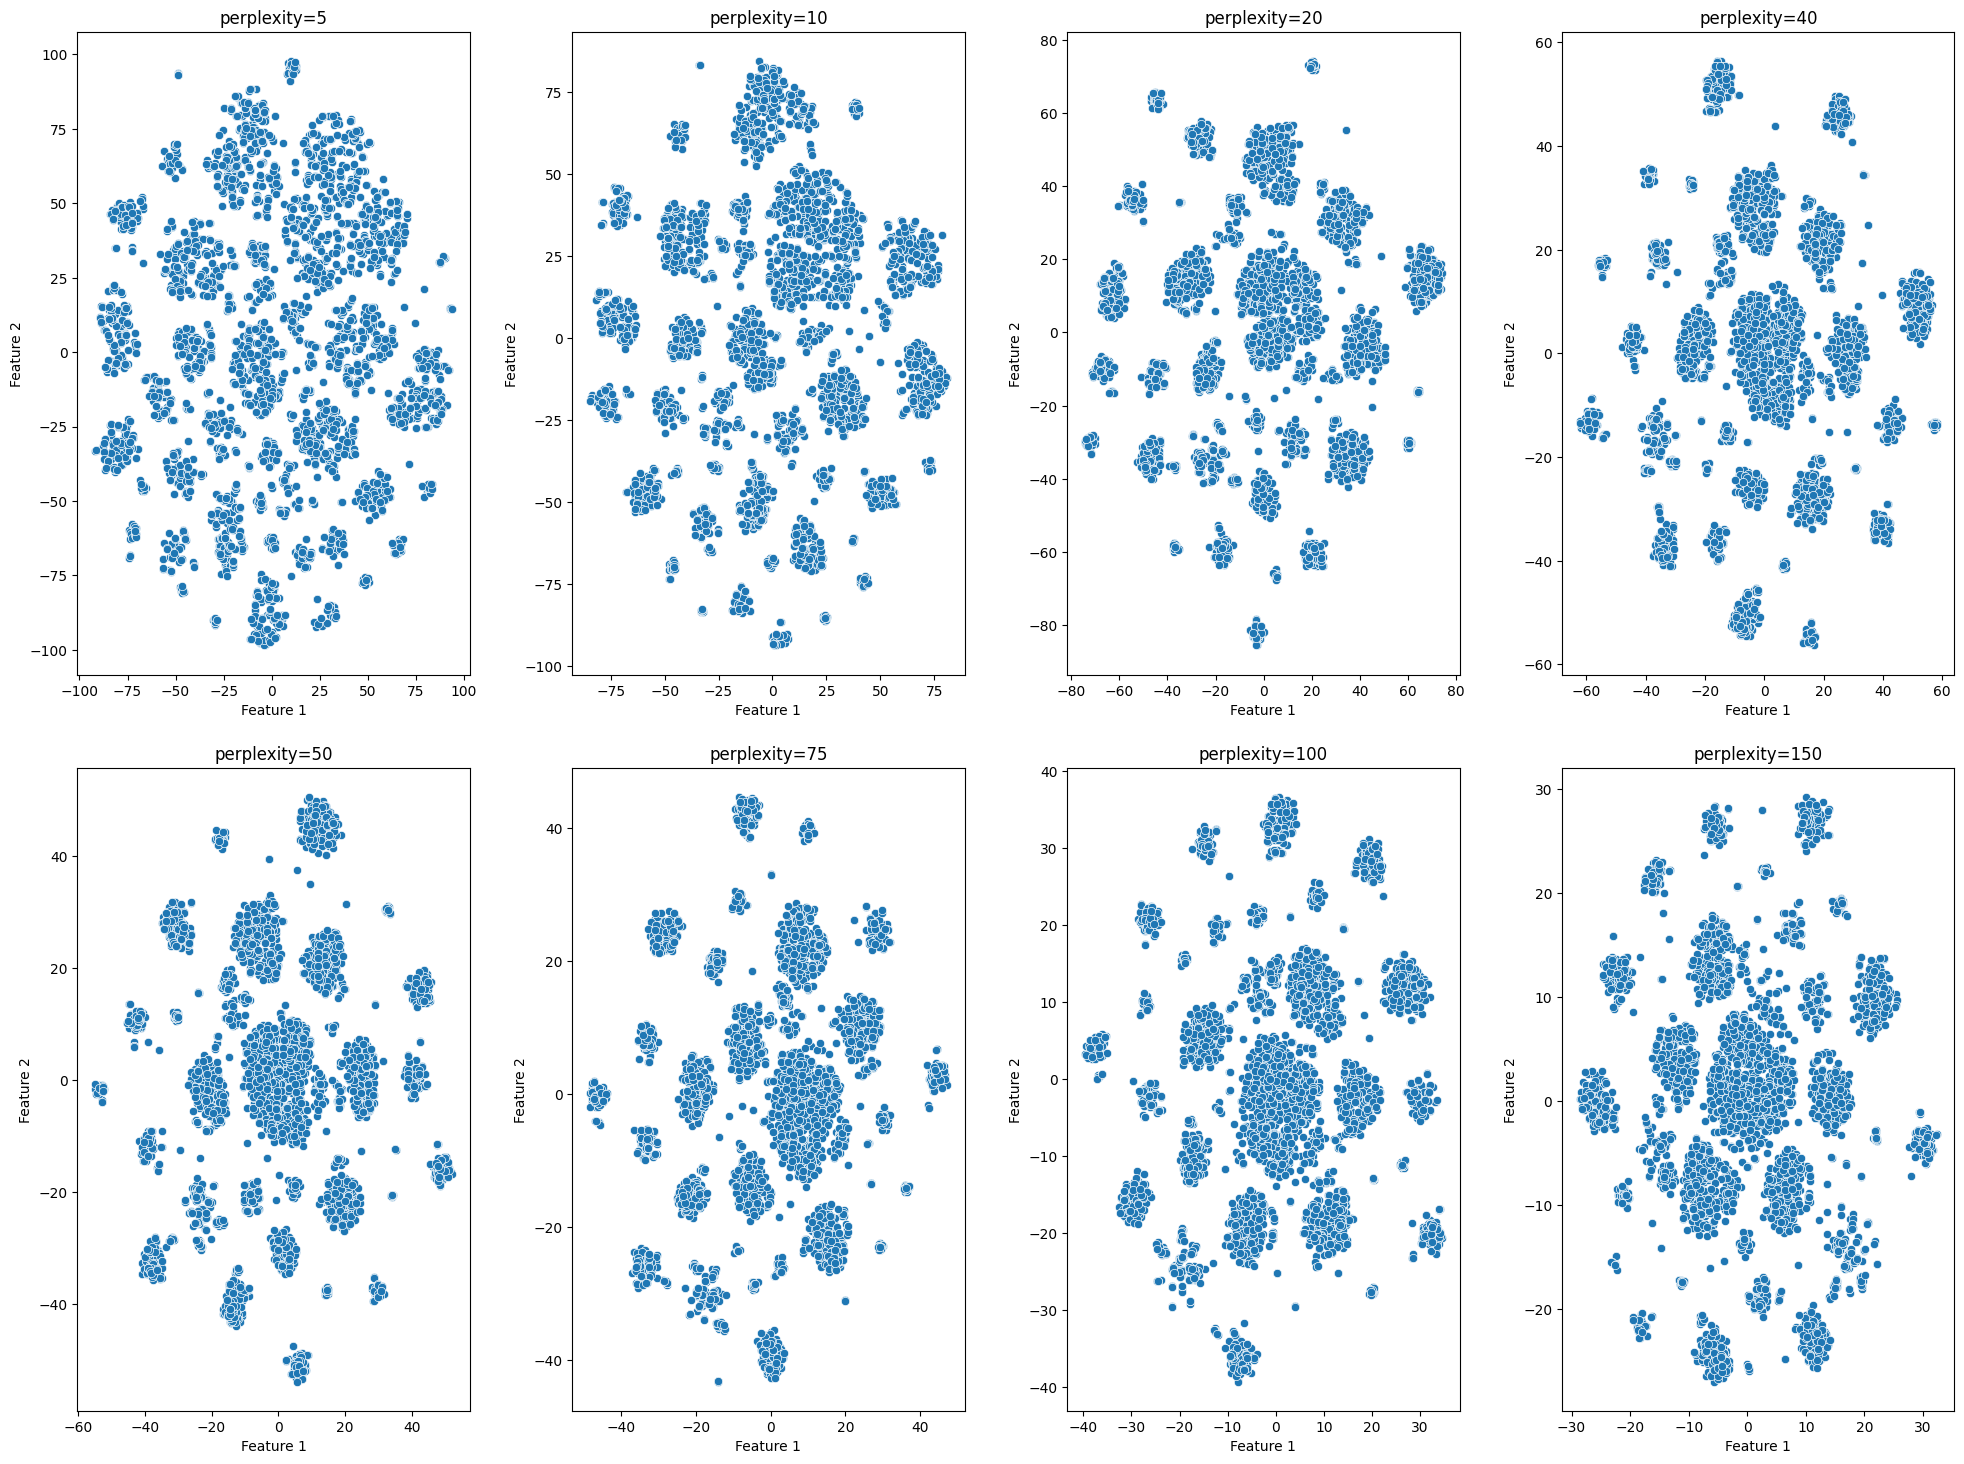

In [69]:
#Determine better clusters through optimal values of perplexity
# Define the list of perplexity values to iterate over
perplexities = [5, 10, 20, 40, 50, 75, 100, 150]

plt.figure(figsize=(20, 15))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexities[i], n_jobs=-2, random_state=RS)    # n_jobs specifies the nunmber of cores to use for parallel computation; -2 means use all but 1 core
    X_red = tsne.fit_transform(subset_scaled_df)   # fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
    red_data_df = pd.DataFrame(data=X_red, columns=["Feature 1", "Feature 2"])    # creating a new dataframe with reduced dimensions

    # Adjust the subplot grid to 2x4
    plt.subplot(2, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

In [156]:
#Copy original scaled dataframe
k_means_df = subset_scaled_df.copy()
#Use Within Clusters Sum of Squares Elbow Method to determine optimal number of clusters
clusters = range(2, 20)
WCSS = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=RS)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)

    wcss = model.inertia_


    WCSS.append(wcss)

    print("Number of Clusters:", k, "\twcss:", wcss)

Number of Clusters: 2 	wcss: 286220.17963443726
Number of Clusters: 3 	wcss: 277860.7129478968
Number of Clusters: 4 	wcss: 273936.3294083172
Number of Clusters: 5 	wcss: 269808.16285351285
Number of Clusters: 6 	wcss: 266281.82114943676
Number of Clusters: 7 	wcss: 263818.732627114
Number of Clusters: 8 	wcss: 259049.86895472085
Number of Clusters: 9 	wcss: 257125.18717828795
Number of Clusters: 10 	wcss: 251984.03080095848
Number of Clusters: 11 	wcss: 245983.44007322303
Number of Clusters: 12 	wcss: 242455.22911149575
Number of Clusters: 13 	wcss: 240038.11920706523
Number of Clusters: 14 	wcss: 236509.35318195057
Number of Clusters: 15 	wcss: 232973.44701250573
Number of Clusters: 16 	wcss: 231232.69195018505
Number of Clusters: 17 	wcss: 228239.3002681617
Number of Clusters: 18 	wcss: 224673.43167321233
Number of Clusters: 19 	wcss: 221876.7278374717


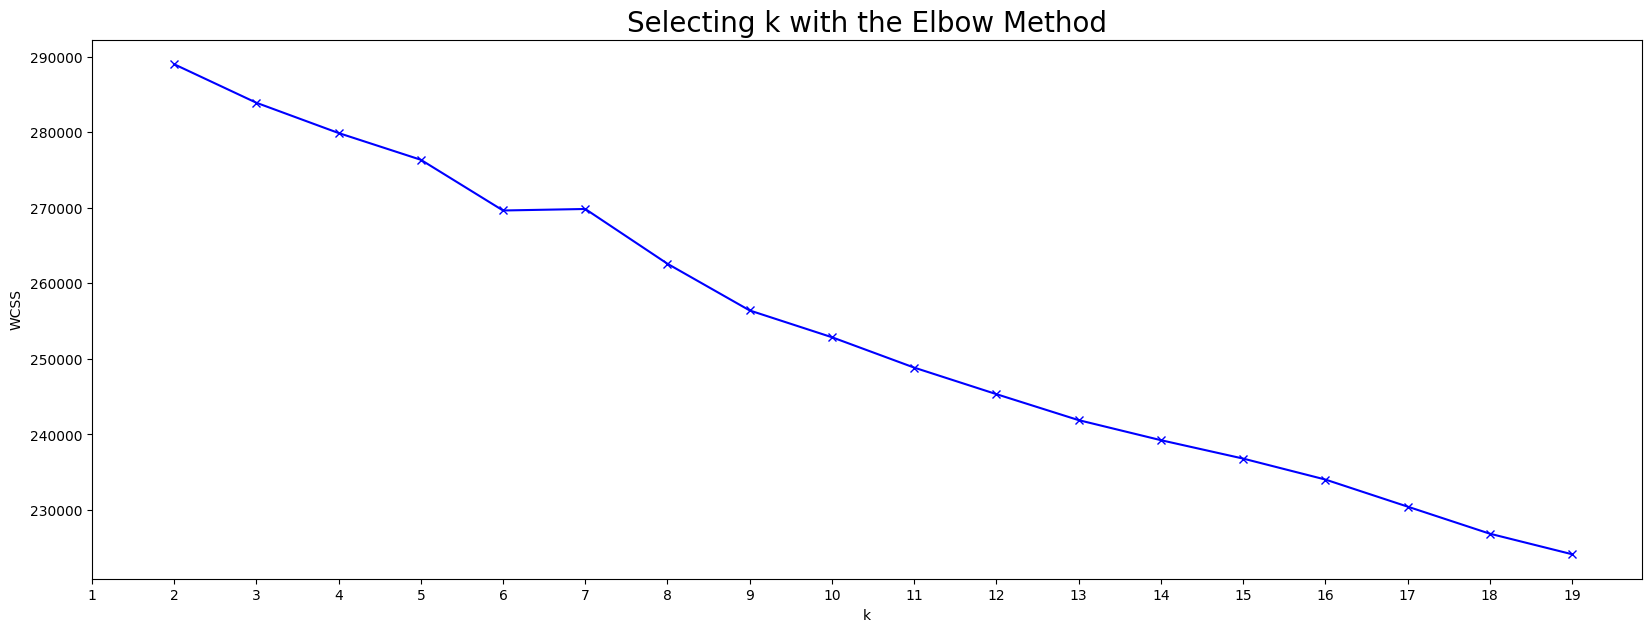

In [71]:
plt.figure(figsize=(20, 7))
plt.plot(clusters,WCSS,"bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,20,1))
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [72]:
#Compute Silhouette score for each iteration of number of clusters
sil_score = []
cluster_list = range(2, 30)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=RS)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.035553496520661025)
For n_clusters = 3, the silhouette score is 0.03195692078290948)
For n_clusters = 4, the silhouette score is 0.02738674062243913)
For n_clusters = 5, the silhouette score is 0.028551472505565216)
For n_clusters = 6, the silhouette score is 0.03883720086871777)
For n_clusters = 7, the silhouette score is 0.03900047022006474)
For n_clusters = 8, the silhouette score is 0.022465796419198065)
For n_clusters = 9, the silhouette score is 0.04191339088609079)
For n_clusters = 10, the silhouette score is 0.045885379620855794)
For n_clusters = 11, the silhouette score is 0.04818152889450171)
For n_clusters = 12, the silhouette score is 0.048638098605101925)
For n_clusters = 13, the silhouette score is 0.05371099200221255)
For n_clusters = 14, the silhouette score is 0.048202744072179324)
For n_clusters = 15, the silhouette score is 0.04987988390256386)
For n_clusters = 16, the silhouette score is 0.05311410897726443)
For n_cluste

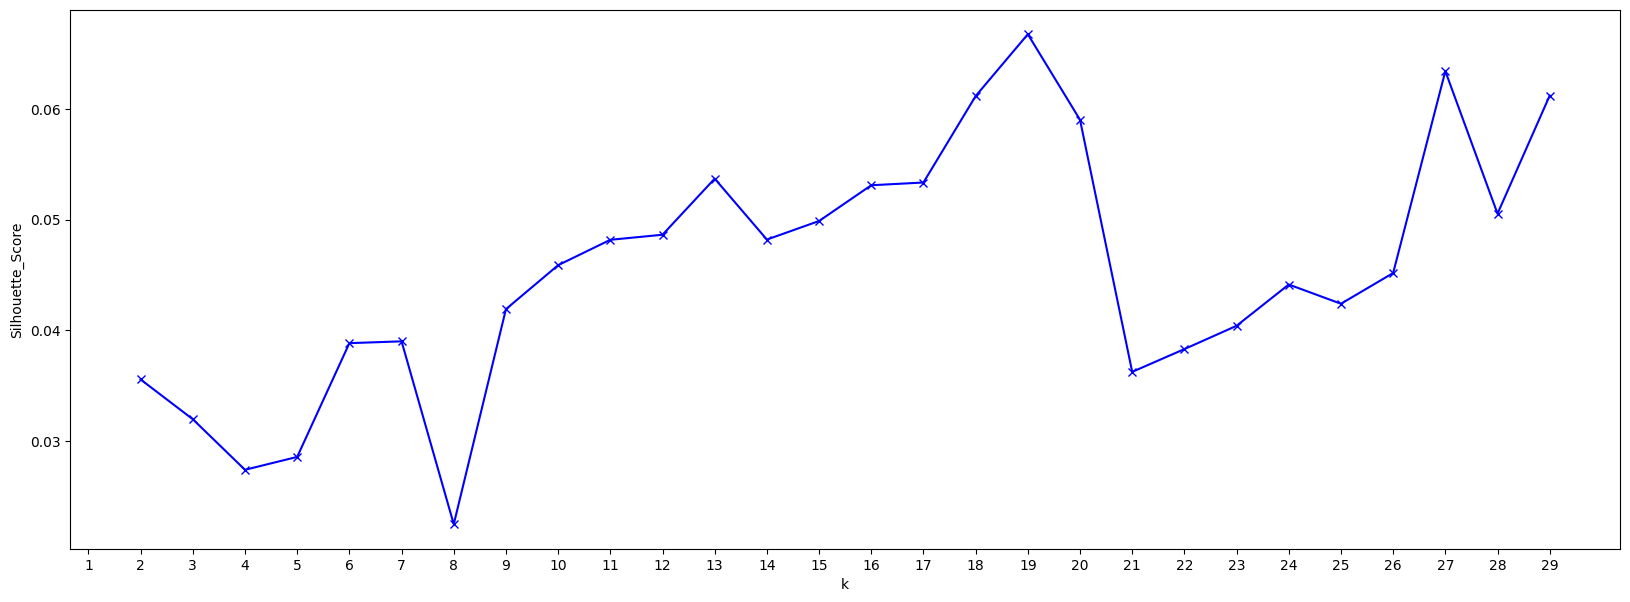

In [73]:
plt.figure(figsize=(20, 7))
plt.plot(cluster_list, sil_score, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette_Score")
plt.xticks(np.arange(1,30,1))

plt.show()

In [105]:
#Copy original scaled dataframe
k_means_df = subset_scaled_df.copy()
kmeans = KMeans(n_clusters=19, random_state=RS)
kmeans.fit(k_means_df)

KMeans(n_clusters=19, random_state=0)

In [106]:
# creating a copy of the original data
df1 = X_dummy_train.copy()
# adding kmeans cluster labels to the dataframes
k_means_df["K_means_segments"] = kmeans.labels_    # labeling each of the scaled datadrame row with cluster id
df1["clusters"] = kmeans.labels_    # utilizing the same cluster id on treated original dataset
#tsne_2d_data["K_means_segments"] = kmeans.labels_    # labeling t-SNE 2D with cluster id
#tsne_3d_data["K_means_segments"] = kmeans.labels_    # labeling t-SNE 3D with cluster id

In [58]:
# visualizing the final cluster using t-SNE 2D
sns.scatterplot(data=tsne_2d_data, x='Feature 1', y='Feature 2', hue='K_means_segments');

ValueError: Could not interpret value `K_means_segments` for `hue`. An entry with this name does not appear in `data`.

In [107]:
#Add back the personal loan column into df1 as we want to see the personal loan conversion in each segment
df1['Annual_Turnover'] = X_dummy['Annual_Turnover']
#Group each column by clusters, and average out each feature per cluster to understand segment characteristics
km_cluster_profile = df1.groupby("clusters").mean()

In [108]:
#Understand the sample size represented by each segment
km_cluster_profile["count_in_each_segment"] = (
    df1.select_dtypes(include=np.number).groupby("clusters")["Age"].count().values
)

In [109]:
# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Facebook_Popularity_Quotient,Instagram_Popularity_Quotient,Resturant_Tier,Restaurant_Zomato_Rating,Restaurant_City_Tier,Staff_Responsivness,Value_for_Money,Hygiene_Rating,Overall_Restaurant_Rating,Live_Music_Rating,Value_Deals_Rating,Ambience,Lively,Comfortablility,Privacy,Age,Cuisine_algerian_belgian,Cuisine_chinese_salvadorian,Cuisine_cuban_british,Cuisine_hawaiian_latvian,Cuisine_irish_belgian,Cuisine_peruvian_cuban,Cuisine_swedish_greek,Cuisine_tibetan_italian,Cuisine_turkish_nigerian,Cuisine_turkish_sapnish,Cuisine_welsh_thai,Restaurant_Location_Near_Party_Hub,Situated_in_a_Multi_Complex_1,Restaurant_Type_Caffee,Restaurant_Theme_Belise,Restaurant_Theme_Chinese,Restaurant_Theme_Greek,Restaurant_Theme_Moonrise,Restaurant_Theme_Parsi,Annual_Turnover,count_in_each_segment
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,76.820109,72.308012,1.992565,2.691450,0.282528,4.338290,4.464684,4.453532,8.489695,3.591078,0.992565,6.553331,6.724907,3.449814,6.223048,5760.992565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.758364,0.795539,0.000000,0.000000,0.000000,0.178439,0.000000,0.000000,26425650.557621,269
1,82.987234,80.444032,2.000000,2.901176,0.322353,4.823529,4.741176,5.035294,8.250235,1.894118,0.145882,7.215746,7.411765,2.752941,6.552941,5665.167059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167059,0.000000,0.000000,0.007059,0.734118,0.811765,0.000000,0.000000,0.000000,0.917647,0.000000,0.000000,31337647.058824,425
2,76.991083,74.886763,1.971831,2.704225,0.260563,4.352113,4.485915,4.711268,8.339737,2.500000,0.373239,6.225352,6.669014,3.485915,6.422535,5936.478873,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.823944,0.809859,0.028169,0.000000,0.000000,0.478873,0.000000,0.000000,29478873.239437,142
3,77.618323,73.386907,1.946429,2.607143,0.312500,4.321429,4.348214,4.241071,8.342506,2.705357,0.642857,6.566277,7.062500,3.642857,6.491071,5833.276786,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.767857,0.785714,0.044643,0.000000,0.000000,0.312500,0.000000,0.000000,27843750.000000,112
4,77.153487,73.014375,1.915663,2.710843,0.325301,4.530120,4.397590,4.518072,8.531778,3.228916,1.096386,6.209916,6.566265,3.590361,5.927711,5816.807229,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.783133,0.843373,0.096386,0.000000,0.000000,0.265060,0.000000,0.000000,22626506.024096,83
5,76.699941,73.686262,1.881579,2.611842,0.302632,4.467105,4.434211,4.559211,8.262081,2.934211,0.815789,6.183198,6.986842,3.006579,6.296053,5839.342105,0.000000,0.006579,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.019737,0.914474,0.000000,0.664474,0.809211,0.072368,0.085526,0.000000,0.263158,0.000000,0.000000,26996710.526316,152
6,80.449000,76.001394,2.000000,2.859813,0.314642,4.859813,4.769470,4.791277,8.774637,4.289720,3.971963,7.002156,7.417445,2.280374,6.676012,5401.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112150,0.003115,0.000000,0.009346,0.719626,0.816199,0.000000,0.000000,0.000000,0.059190,0.000000,0.000000,29445482.866044,321
7,71.285594,68.092751,1.997664,2.252336,0.278037,3.936916,3.841121,3.794393,7.651139,2.266355,0.397196,5.444194,5.677570,4.009346,5.464953,5937.978972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121495,0.000000,0.000000,0.004673,0.843458,0.799065,0.000000,0.000000,0.000000,0.310748,0.000000,0.000000,26576869.158879,428
8,83.998771,80.164500,1.000000,3.000000,0.517857,5.309524,5.208333,5.815476,8.924710,3.773810,0.839286,6.035714,7.125000,2.976190,6.505952,5862.386905,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148810,0.065476,0.000000,0.089286,0.815476,0.839286,0.000000,0.000000,0.000000,0.345238,0.000000,0.000000,47092261.904762,168


In [110]:
features=df1.columns.tolist()
features.remove('Annual_Turnover')
features.remove('clusters')
target='Annual_Turnover'
print(features)

['Facebook_Popularity_Quotient', 'Instagram_Popularity_Quotient', 'Resturant_Tier', 'Restaurant_Zomato_Rating', 'Restaurant_City_Tier', 'Staff_Responsivness', 'Value_for_Money', 'Hygiene_Rating', 'Overall_Restaurant_Rating', 'Live_Music_Rating', 'Value_Deals_Rating', 'Ambience', 'Lively', 'Comfortablility', 'Privacy', 'Age', 'Cuisine_algerian_belgian', 'Cuisine_chinese_salvadorian', 'Cuisine_cuban_british', 'Cuisine_hawaiian_latvian', 'Cuisine_irish_belgian', 'Cuisine_peruvian_cuban', 'Cuisine_swedish_greek', 'Cuisine_tibetan_italian', 'Cuisine_turkish_nigerian', 'Cuisine_turkish_sapnish', 'Cuisine_welsh_thai', 'Restaurant_Location_Near_Party_Hub', 'Situated_in_a_Multi_Complex_1', 'Restaurant_Type_Caffee', 'Restaurant_Theme_Belise', 'Restaurant_Theme_Chinese', 'Restaurant_Theme_Greek', 'Restaurant_Theme_Moonrise', 'Restaurant_Theme_Parsi']


In [111]:
n_clusters = 19
#Separate Data by Cluster and 5. Perform Regression on Each Cluster
regression_models = {}
for cluster_id in range(n_clusters):
    cluster_data = df1[df1['clusters'] == cluster_id]

    if len(cluster_data) > 2:
        X_cluster = cluster_data[features]
        y_cluster = cluster_data[target]

        # Train-test split within the cluster for robust evaluation
        X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_cluster, y_cluster)
        regression_models[f'cluster_{cluster_id}'] = model

        # Evaluate the model
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"Cluster {cluster_id} Regression MSE: {mse}")
    else:
        print(f"Cluster {cluster_id} is empty, no regression performed.")

Cluster 0 Regression MSE: 202006223777527.25
Cluster 1 Regression MSE: 126105211159176.45
Cluster 2 Regression MSE: 96647923317469.39
Cluster 3 Regression MSE: 119842932451967.5
Cluster 4 Regression MSE: 107202502958441.25
Cluster 5 Regression MSE: 180815717406718.72
Cluster 6 Regression MSE: 133441197746098.67
Cluster 7 Regression MSE: 120515775814350.42
Cluster 8 Regression MSE: 648559406884797.2
Cluster 9 Regression MSE: 89121713886791.73
Cluster 10 Regression MSE: 43679745959556.26
Cluster 11 Regression MSE: 614268085960707.1
Cluster 12 Regression MSE: 121336834625998.34
Cluster 13 Regression MSE: 98506753400231.62
Cluster 14 Regression MSE: 8.881784197001252e-16
Cluster 15 Regression MSE: 100117495782116.73
Cluster 16 Regression MSE: 115597292931087.92
Cluster 17 Regression MSE: 998491286909168.8
Cluster 18 Regression MSE: 256882685737229.06


In [112]:
print(regression_models)

{'cluster_0': LinearRegression(), 'cluster_1': LinearRegression(), 'cluster_2': LinearRegression(), 'cluster_3': LinearRegression(), 'cluster_4': LinearRegression(), 'cluster_5': LinearRegression(), 'cluster_6': LinearRegression(), 'cluster_7': LinearRegression(), 'cluster_8': LinearRegression(), 'cluster_9': LinearRegression(), 'cluster_10': LinearRegression(), 'cluster_11': LinearRegression(), 'cluster_12': LinearRegression(), 'cluster_13': LinearRegression(), 'cluster_14': LinearRegression(), 'cluster_15': LinearRegression(), 'cluster_16': LinearRegression(), 'cluster_17': LinearRegression(), 'cluster_18': LinearRegression()}


In [87]:
# Create a base Random Forest Regressor model
rf = RandomForestRegressor(oob_score=True,random_state=42)

# Define the hyperparameter grid for tuning
#param_grid = {
#    'n_estimators': [100, 200, 300],  # Number of trees in the forest
#    'max_depth': [5, 10, 20],      # Maximum depth of the tree
#    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#    'max_features': ['sqrt', 'log2', 0.8] # Number of features to consider when looking for the best split
#}
param_grid = {
    'n_estimators': [150],  # Number of trees in the forest
    'max_depth': [20],      # Maximum depth of the tree
    'min_samples_split': [5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [3,6],    # Minimum number of samples required to be at a leaf node
    'max_features': [None] # Number of features to consider when looking for the best split
}

In [88]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': [None],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10], 'n_estimators': [150]},
             scoring='neg_mean_squared_error', verbose=1)

In [89]:
# Print the best parameters found
print(f"Best hyperparameters: {grid_search.best_params_}")

# Get the best estimator (model with optimal hyperparameters)
best_rf_model = grid_search.best_estimator_

Best hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 150}


In [90]:
# Make predictions on the test set
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model
mse_train=mean_squared_error(y_train, y_pred_train)
r2_train=r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error on Train Set: {mse_train}")
print(f"R-squared on Train Set: {r2_train}")
print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"R-squared on Test Set: {r2_test}")

Mean Squared Error on Train Set: 272912424337763.3
R-squared on Train Set: 0.4219642415297382
Mean Squared Error on Test Set: 370564093392423.25
R-squared on Test Set: 0.18498105397741404


In [62]:
# initial list of columns
cols = dataLR.columns.tolist()
predictor_cols_for_formula = [col for col in X_train]
# setting an initial max p-value
max_p_value = 1
i=0

while len(cols) > 0:
    # defining the train set
    X_train_aux = dataLR[cols]
    formula = str('Annual_Turnover ~ ' + ' + '.join(predictor_cols_for_formula))

    # fitting the model
    model = smf.ols(formula=formula, data=X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    suffix_to_remove='[T.True]'
    if feature_with_p_max.endswith(suffix_to_remove):
        feature_with_p_max=feature_with_p_max.removesuffix(suffix_to_remove)
    print(i)
    i=i+1
    print(feature_with_p_max)
    print(max_p_value)
    if max_p_value > 0.15:  #Taking 0.05 as the screening criteria.
        cols.remove(feature_with_p_max) #remove any columns with p-value above p-max
        predictor_cols_for_formula.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

0
Restaurant_Theme_Flavors
0.9932884002883323
1
Restaurant_Theme_TheGem
0.9925553459921581
2
Restaurant_Theme_Sage
0.9747233203324982
3
Cuisine_algerian_korean
0.9738080844929997
4
Restaurant_Type_Gastro_Bar
0.9549166193115208
5
Cuisine_british_belgian
0.9308274248720961
6
Order_Wait_Time
0.9173629270063577
7
Restaurant_Theme_Cafepro
0.8494301656342638
8
Cuisine_indian_irish
0.8489418277803706
9
Cuisine_nigerian_cajun
0.8581954983981652
10
Restaurant_Type_Buffet_Family_Restaurant
0.8025123576547648
11
Restaurant_Theme_Piquant
0.8025123576547849
12
Food_Rating
0.8005034487613071
13
Restaurant_Theme_Benedicta
0.8065206631752019
14
Comedy_Gigs_Rating
0.799261437187385
15
Service
0.7893623892004891
16
Restaurant_Theme_Picante
0.7901327458048912
17
Restaurant_Theme_Savory
0.7547433796072743
18
Cuisine_tibetan_greek
0.7369134059259154
19
Cuisine_british_japanese
0.7629148168840929
20
Restaurant_Theme_Nature
0.7113647282733915
21
Endorsed_By_Not_Specific
0.7018800330216085
22
Restaurant_Theme

In [63]:
print(model.pvalues)

Intercept                                     3.394624e-04
Cuisine_algerian_belgian[T.True]              1.036037e-01
Cuisine_chinese_salvadorian[T.True]           4.759991e-03
Cuisine_cuban_british[T.True]                 6.257299e-02
Cuisine_hawaiian_latvian[T.True]              1.033342e-02
Cuisine_irish_belgian[T.True]                 6.858615e-05
Cuisine_peruvian_cuban[T.True]                1.254808e-01
Cuisine_swedish_greek[T.True]                 5.753313e-02
Cuisine_tibetan_italian[T.True]               1.390174e-01
Cuisine_turkish_nigerian[T.True]              9.229323e-02
Cuisine_turkish_sapnish[T.True]               4.434100e-03
Cuisine_welsh_thai[T.True]                    1.127739e-05
Restaurant_Location_Near_Party_Hub[T.True]    1.603302e-02
Situated_in_a_Multi_Complex_1[T.True]         8.800155e-05
Restaurant_Type_Caffee[T.True]                2.128855e-02
Restaurant_Theme_Belise[T.True]               9.683653e-02
Restaurant_Theme_Chinese[T.True]              1.406432e-

In [64]:
X_train.head()

,Facebook_Popularity_Quotient,Instagram_Popularity_Quotient,Resturant_Tier,Restaurant_Zomato_Rating,Restaurant_City_Tier,Order_Wait_Time,Staff_Responsivness,Value_for_Money,Hygiene_Rating,Food_Rating,Overall_Restaurant_Rating,Live_Music_Rating,Comedy_Gigs_Rating,Value_Deals_Rating,Live_Sports_Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age,Cuisine_algerian_belgian,Cuisine_algerian_korean,Cuisine_british_belgian,Cuisine_british_japanese,Cuisine_chinese_salvadorian,Cuisine_cuban_british,Cuisine_hawaiian_latvian,Cuisine_indian_irish,Cuisine_irish_belgian,Cuisine_japanese_thai,Cuisine_nigerian_cajun,Cuisine_peruvian_cuban,Cuisine_polish_jewish,Cuisine_swedish_greek,Cuisine_tibetan_greek,Cuisine_tibetan_italian,Cuisine_turkish_nigerian,Cuisine_turkish_sapnish,Cuisine_welsh_thai,Restaurant_Location_Near_Party_Hub,Endorsed_By_Not_Specific,Endorsed_By_Tier_A_Celebrity,Fire_Audit_1,Liquor_License_Obtained_1,Situated_in_a_Multi_Complex_1,Dedicated_Parking_1,Open_Sitting_Available_1,Restaurant_Type_Buffet_Family_Restaurant,Restaurant_Type_Caffee,Restaurant_Type_Gastro_Bar,Restaurant_Theme_Ambiance,Restaurant_Theme_Arabian,Restaurant_Theme_Bakery,Restaurant_Theme_Belise,Restaurant_Theme_Benedicta,Restaurant_Theme_Bettaso,Restaurant_Theme_Cafepro,Restaurant_Theme_Carbone,Restaurant_Theme_Chinese,Restaurant_Theme_Cinnamon,Restaurant_Theme_Delicio,Restaurant_Theme_Downtown,Restaurant_Theme_English,Restaurant_Theme_Flavors,Restaurant_Theme_Grand,Restaurant_Theme_Greek,Restaurant_Theme_Italica,Restaurant_Theme_LaCuisine,Restaurant_Theme_Marco,Restaurant_Theme_Mise_En,Restaurant_Theme_Molino,Restaurant_Theme_Moonrise,Restaurant_Theme_Nature,Restaurant_Theme_Parsi,Restaurant_Theme_Petit,Restaurant_Theme_Picante,Restaurant_Theme_Piquant,Restaurant_Theme_Resca,Restaurant_Theme_Sage,Restaurant_Theme_Savory,Restaurant_Theme_Spoon,Restaurant_Theme_TheGem,Restaurant_Theme_Umami
1908,86.15,83.0,2.0,2.0,1.0,5.0,5.0,5.0,5.0,10.0,9.0,6.0,0.0,4.0,0.0,5.0,9.0,2.0,2.0,6.0,5672.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660,79.60,68.2,2.0,2.0,1.0,5.0,6.0,4.0,5.0,7.0,6.0,4.0,0.0,2.0,0.0,6.0,8.0,5.0,2.0,7.0,6405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
485,94.80,93.0,2.0,3.0,0.0,1.0,6.0,5.0,5.0,6.0,10.0,4.0,0.0,0.0,0.0,7.0,7.0,3.0,7.0,7.0,5463.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
883,74.00,86.1,2.0,3.0,0.0,7.0,4.0,3.0,5.0,5.0,10.0,4.0,0.0,0.0,0.0,3.0,5.0,3.0,3.0,7.0,7128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1311,62.00,60.2,2.0,3.0,0.0,4.0,3.0,4.0,5.0,6.0,10.0,3.0,3.0,0.0,0.0,4.0,10.0,4.0,3.0,6.0,5964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# 1. Fit the model only on selected features
#remove Annual_Turnover from selected features
selected_features.remove('Annual_Turnover')
#print(selected_features)
X_train=(X_train[selected_features]).astype(float)
X_train.head()
X_test=(X_test[selected_features]).astype(float)
X_dummy_train=(X_dummy_train[selected_features]).astype(float)
#y_train=y_train['Annual_Turnover']
#X_train.head()
#X_train.info()
model = sm.OLS(y_dummy_train, X_dummy_train)
results = model.fit()
#X_test=X_test[selected_features]
# 2. Make predictions on new data

In [66]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Annual_Turnover   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              253.8
Date:                Wed, 19 Nov 2025   Prob (F-statistic):                        0.00
Time:                        06:54:36   Log-Likelihood:                         -63660.
No. Observations:                3493   AIC:                                  1.274e+05
Df Residuals:                    3458   BIC:                                  1.276e+05
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [67]:
## Declaring the Linear Regression function

LR = LinearRegression()

In [68]:
LR.fit(X_dummy_train,y_dummy_train)

LinearRegression()

In [ ]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [45]:
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_dummy_train_scaled = scaler.fit_transform(X_dummy_train)
alphas = np.logspace(-3, 3, 100) # 100 alpha values from 10^-3 to 10^3
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_dummy_train_scaled, y_dummy_train)
best_alpha = ridge_cv.alpha_
print(f"The best alpha found by RidgeCV is: {best_alpha}")


The best alpha found by RidgeCV is: 869.7490026177834


In [69]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_dummy_train, y_dummy_train)
score = ridge_model.score(X_dummy_train, y_dummy_train)
print(f"Ridge Regression Train R-squared: {score:.2f}")

Ridge Regression Train R-squared: 0.16


In [70]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_dummy_train, y_dummy_train)

# Evaluate the model
score = lasso_model.score(X_dummy_train, y_dummy_train)
print(f"Lasso Regression Train R-squared: {score:.2f}")

Lasso Regression Train R-squared: 0.16


In [71]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_dummy_train, y_dummy_train)

# Evaluate the model
score = elastic_net_model.score(X_dummy_train, y_dummy_train)
print(f"Elastic Net Train R-squared: {score:.2f}")

Elastic Net Train R-squared: 0.15


In [101]:
y_train_pred=results.predict(X_train)
y_test_pred=results.predict(X_test)

In [102]:
    from sklearn.metrics import r2_score

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"Train R-squared: {train_r2:.2f}")
    print(f"Test R-squared: {test_r2:.2f}")

Train R-squared: 0.14
Test R-squared: 0.16


In [103]:
    from sklearn.metrics import mean_absolute_error

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    print(f"Train MAE: {train_mae:.2f}")
    print(f"Test MAE: {test_mae:.2f}")

Train MAE: 10928256.81
Test MAE: 10560255.74


In [104]:
    from sklearn.metrics import mean_squared_error

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"Train MSE: {train_mse:.2f}")
    print(f"Test MSE: {test_mse:.2f}")

Train MSE: 405562273498031.81
Test MSE: 381384503733430.81


In [105]:
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 20138576.75
Test RMSE: 19529068.17


# Loading the Test Data and using the Test Data to Predict the target Variable

In [46]:
data_test = pd.read_csv('Test_dataset_.csv')
data_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [47]:
## Checking for the null values

data_test.isnull().sum()

,0
Registration Number,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endoresed By,0
Instagram Popularity Quotient,0
Fire Audit,0
Liquor License Obtained,0


In [48]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            500 non-null    int64  
 1   Cuisine                        500 non-null    object 
 2   City                           500 non-null    object 
 3   Restaurant Location            500 non-null    object 
 4   Opening Day of Restaurant      500 non-null    object 
 5   Facebook Popularity Quotient   500 non-null    float64
 6   Endoresed By                   500 non-null    object 
 7   Instagram Popularity Quotient  500 non-null    float64
 8   Fire Audit                     500 non-null    int64  
 9   Liquor License Obtained        500 non-null    int64  
 10  Situated in a Multi Complex    500 non-null    int64  
 11  Dedicated Parking              500 non-null    int64  
 12  Open Sitting Available         500 non-null    int

In [49]:
newdata_test=data_test.copy()

In [50]:
newdata_test.drop(columns=['Registration Number','City'],axis=1,inplace=True)

In [62]:
#Convert opening day of restaurant into age
newdata_test['Opening Day of Restaurant']=pd.to_datetime(newdata_test['Opening Day of Restaurant'], format="%d-%m-%Y")
newdata_test['current']=pd.to_datetime(datetime.now())
newdata_test['Age']=newdata_test['current']-newdata_test['Opening Day of Restaurant']
newdata_test['Age']=newdata_test['Age'].dt.days
newdata_test.drop(['Opening Day of Restaurant','current'],axis=1,inplace=True)
newdata_test.head()

,Cuisine,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age
0,"tibetan,italian",Near Business Hub,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.000000,0.0,2.0,0.0,0.0,5,2,2,6,0,5608
1,"tibetan,italian",Near Party Hub,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.000000,3.0,0.0,0.0,6.0,7,8,5,1,8,5189
2,"algerian,belgian",Near Party Hub,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.000000,3.0,0.0,0.0,0.0,9,7,5,1,5,5335
3,"tibetan,greek",Near Party Hub,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.000000,6.0,0.0,0.0,0.0,6,7,6,4,7,7612
4,"cuban,british",Near Party Hub,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,8.304055,0.0,0.0,0.0,0.0,4,4,7,7,3,6218


In [63]:
#Overall Restaurant Rating is correlated with Value for Money, Hygiene Rating, Live Music Rating, Comedy Gigs Rating, Value Deals Rating, and Live Sports Rating
#Where all of these are blank, impute with average
mark=newdata_test[newdata_test['Overall Restaurant Rating'].isna() & newdata_test['Value for Money'].isna() & newdata_test['Hygiene Rating'].isna() & newdata_test['Live Music Rating'].isna() & newdata_test['Comedy Gigs Rating'].isna() & newdata_test['Value Deals Rating'].isna() & newdata_test['Live Sports Rating'].isna()].index.tolist()
#for these rows, add mean values of instagram and facebook popularity values in the data
for i in mark:
  newdata_test.loc[i,'Overall Restaurant Rating']=newdata_test['Overall Restaurant Rating'].mean()
  newdata_test.loc[i,'Value for Money']=newdata_test['Value for Money'].mean()
  newdata_test.loc[i,'Hygiene Rating']=newdata_test['Hygiene Rating'].mean()
  newdata_test.loc[i,'Live Music Rating']=newdata_test['Live Music Rating'].mean()
  newdata_test.loc[i,'Comedy Gigs Rating']=newdata_test['Comedy Gigs Rating'].mean()
  newdata_test.loc[i,'Value Deals Rating']=newdata_test['Value Deals Rating'].mean()
  newdata_test.loc[i,'Live Sports Rating']=newdata_test['Live Sports Rating'].mean()
#  data['Instagram Popularity Quotient']=data['Instagram Popularity Quotient'].fillna(data['Instagram Popularity Quotient'].mean()

In [64]:
#Fill Live Music Rating, Comedy Gigs Rating, Value Deals Rating, Live Sports Rating as zero wherever missing
newdata_test['Live Music Rating']=newdata_test['Live Music Rating'].fillna(0)
newdata_test['Comedy Gigs Rating']=newdata_test['Comedy Gigs Rating'].fillna(0)
newdata_test['Value Deals Rating']=newdata_test['Value Deals Rating'].fillna(0)
newdata_test['Live Sports Rating']=newdata_test['Live Sports Rating'].fillna(0)

In [65]:
newdata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Cuisine                        500 non-null    category
 1   Restaurant Location            500 non-null    category
 2   Facebook Popularity Quotient   500 non-null    float64 
 3   Endorsed By                    500 non-null    category
 4   Instagram Popularity Quotient  500 non-null    float64 
 5   Fire Audit                     500 non-null    category
 6   Liquor License Obtained        500 non-null    category
 7   Situated in a Multi Complex    500 non-null    category
 8   Dedicated Parking              500 non-null    category
 9   Open Sitting Available         500 non-null    category
 10  Resturant Tier                 500 non-null    int64   
 11  Restaurant Type                500 non-null    category
 12  Restaurant Theme               500 n

In [66]:
from sklearn.experimental import enable_iterative_imputer # Required for IterativeImputer
from sklearn.impute import IterativeImputer
    # Using Linear Regression as the estimator
imputer = IterativeImputer(estimator=LinearRegression(), random_state=42)


In [67]:
target_col='Overall Restaurant Rating'
predictor_cols=['Value for Money','Hygiene Rating','Live Music Rating','Comedy Gigs Rating','Value Deals Rating','Live Sports Rating']
numerical_subset = newdata_test[predictor_cols + [target_col]].copy()
imputer = IterativeImputer(estimator=LinearRegression(), random_state=42)
imputed_data = imputer.fit_transform(numerical_subset)
imputed_data = pd.DataFrame(imputed_data, columns=numerical_subset.columns)
#imputed_data.info()
newdata_test['Overall Restaurant Rating']=imputed_data['Overall Restaurant Rating']

In [68]:
newdata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Cuisine                        500 non-null    category
 1   Restaurant Location            500 non-null    category
 2   Facebook Popularity Quotient   500 non-null    float64 
 3   Endorsed By                    500 non-null    category
 4   Instagram Popularity Quotient  500 non-null    float64 
 5   Fire Audit                     500 non-null    category
 6   Liquor License Obtained        500 non-null    category
 7   Situated in a Multi Complex    500 non-null    category
 8   Dedicated Parking              500 non-null    category
 9   Open Sitting Available         500 non-null    category
 10  Resturant Tier                 500 non-null    int64   
 11  Restaurant Type                500 non-null    category
 12  Restaurant Theme               500 n

In [57]:
newdata_test.rename(columns={'Endoresed By':'Endorsed By'}, inplace=True)

In [58]:
#Convert all features that should have been categorical to categorical
cat_features=['Cuisine','Restaurant Location','Endorsed By','Fire Audit','Liquor License Obtained','Situated in a Multi Complex','Dedicated Parking','Open Sitting Available','Restaurant Type','Restaurant Theme']
for feature in cat_features:
    newdata_test[feature]=newdata_test[feature].astype('category')

In [69]:
newdata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Cuisine                        500 non-null    category
 1   Restaurant Location            500 non-null    category
 2   Facebook Popularity Quotient   500 non-null    float64 
 3   Endorsed By                    500 non-null    category
 4   Instagram Popularity Quotient  500 non-null    float64 
 5   Fire Audit                     500 non-null    category
 6   Liquor License Obtained        500 non-null    category
 7   Situated in a Multi Complex    500 non-null    category
 8   Dedicated Parking              500 non-null    category
 9   Open Sitting Available         500 non-null    category
 10  Resturant Tier                 500 non-null    int64   
 11  Restaurant Type                500 non-null    category
 12  Restaurant Theme               500 n

In [70]:
X_predict=pd.get_dummies(newdata_test,columns=cat_features,drop_first=True)
X_predict.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age,"Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",Restaurant Location_Near Party Hub,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Fire Audit_1,Liquor License Obtained_1,Situated in a Multi Complex_1,Dedicated Parking_1,Open Sitting Available_1,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_Ambiance,Restaurant Theme_Arabian,Restaurant Theme_Belise,Restaurant Theme_Benedicta,Restaurant Theme_Carbone,Restaurant Theme_Chinese,Restaurant Theme_Delicio,Restaurant Theme_English,Restaurant Theme_Greek,Restaurant Theme_Marco,Restaurant Theme_Mise En,Restaurant Theme_Molino,Restaurant Theme_Moonrise,Restaurant Theme_Nature,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante
0,78.00,69.00,2,3,0,10,5,3,5,8,6.000000,0.0,2.0,0.0,0.0,5,2,2,6,0,5608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,89.17,96.00,2,4,0,10,4,5,6,8,9.000000,3.0,0.0,0.0,6.0,7,8,5,1,8,5189,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,84.00,86.00,2,2,0,6,5,5,6,9,6.000000,3.0,0.0,0.0,0.0,9,7,5,1,5,5335,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,79.38,74.40,2,3,0,10,5,5,5,9,9.000000,6.0,0.0,0.0,0.0,6,7,6,4,7,7612,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,84.67,86.46,1,4,1,7,5,5,7,8,8.304055,0.0,0.0,0.0,0.0,4,4,7,7,3,6218,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [71]:
X_predict.columns = X_predict.columns.str.replace(' ', '_').str.replace(',', '_').str.replace('/','_')
X_predict.head()

,Facebook_Popularity_Quotient,Instagram_Popularity_Quotient,Resturant_Tier,Restaurant_Zomato_Rating,Restaurant_City_Tier,Order_Wait_Time,Staff_Responsivness,Value_for_Money,Hygiene_Rating,Food_Rating,Overall_Restaurant_Rating,Live_Music_Rating,Comedy_Gigs_Rating,Value_Deals_Rating,Live_Sports_Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age,Cuisine_algerian_belgian,Cuisine_algerian_korean,Cuisine_british_belgian,Cuisine_british_japanese,Cuisine_chinese_salvadorian,Cuisine_cuban_british,Cuisine_hawaiian_latvian,Cuisine_indian_irish,Cuisine_irish_belgian,Cuisine_japanese_thai,Cuisine_nigerian_cajun,Cuisine_peruvian_cuban,Cuisine_polish_jewish,Cuisine_swedish_greek,Cuisine_tibetan_greek,Cuisine_tibetan_italian,Cuisine_turkish_nigerian,Cuisine_turkish_sapnish,Cuisine_welsh_thai,Restaurant_Location_Near_Party_Hub,Endorsed_By_Not_Specific,Endorsed_By_Tier_A_Celebrity,Fire_Audit_1,Liquor_License_Obtained_1,Situated_in_a_Multi_Complex_1,Dedicated_Parking_1,Open_Sitting_Available_1,Restaurant_Type_Buffet_Family_Restaurant,Restaurant_Type_Caffee,Restaurant_Type_Gastro_Bar,Restaurant_Theme_Ambiance,Restaurant_Theme_Arabian,Restaurant_Theme_Belise,Restaurant_Theme_Benedicta,Restaurant_Theme_Carbone,Restaurant_Theme_Chinese,Restaurant_Theme_Delicio,Restaurant_Theme_English,Restaurant_Theme_Greek,Restaurant_Theme_Marco,Restaurant_Theme_Mise_En,Restaurant_Theme_Molino,Restaurant_Theme_Moonrise,Restaurant_Theme_Nature,Restaurant_Theme_Parsi,Restaurant_Theme_Petit,Restaurant_Theme_Picante
0,78.00,69.00,2,3,0,10,5,3,5,8,6.000000,0.0,2.0,0.0,0.0,5,2,2,6,0,5608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,89.17,96.00,2,4,0,10,4,5,6,8,9.000000,3.0,0.0,0.0,6.0,7,8,5,1,8,5189,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,84.00,86.00,2,2,0,6,5,5,6,9,6.000000,3.0,0.0,0.0,0.0,9,7,5,1,5,5335,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,79.38,74.40,2,3,0,10,5,5,5,9,9.000000,6.0,0.0,0.0,0.0,6,7,6,4,7,7612,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,84.67,86.46,1,4,1,7,5,5,7,8,8.304055,0.0,0.0,0.0,0.0,4,4,7,7,3,6218,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [72]:
missing_columns=set(X_dummy_train.columns)-set(X_predict.columns)
print(missing_columns)
for col in missing_columns:
    X_predict[col]=0

{'Restaurant_Theme_Cinnamon', 'Restaurant_Theme_Sage', 'Restaurant_Theme_Cafepro', 'Restaurant_Theme_Umami', 'Restaurant_Theme_TheGem', 'Restaurant_Theme_Downtown', 'Restaurant_Theme_Savory', 'Restaurant_Theme_Piquant', 'Restaurant_Theme_Italica', 'Restaurant_Theme_Bettaso', 'Restaurant_Theme_Resca', 'Restaurant_Theme_Bakery', 'Restaurant_Theme_Flavors', 'Restaurant_Theme_Grand', 'Restaurant_Theme_LaCuisine', 'Restaurant_Theme_Spoon'}


In [79]:
target_cols=list(X_dummy_train.columns)
X_predict=X_predict[target_cols]
X_predict=X_predict.reindex(columns=target_cols)
X_predict.head()

,Facebook_Popularity_Quotient,Instagram_Popularity_Quotient,Resturant_Tier,Restaurant_Zomato_Rating,Restaurant_City_Tier,Order_Wait_Time,Staff_Responsivness,Value_for_Money,Hygiene_Rating,Food_Rating,Overall_Restaurant_Rating,Live_Music_Rating,Comedy_Gigs_Rating,Value_Deals_Rating,Live_Sports_Rating,Ambience,Lively,Service,Comfortablility,Privacy,Age,Cuisine_algerian_belgian,Cuisine_algerian_korean,Cuisine_british_belgian,Cuisine_british_japanese,Cuisine_chinese_salvadorian,Cuisine_cuban_british,Cuisine_hawaiian_latvian,Cuisine_indian_irish,Cuisine_irish_belgian,Cuisine_japanese_thai,Cuisine_nigerian_cajun,Cuisine_peruvian_cuban,Cuisine_polish_jewish,Cuisine_swedish_greek,Cuisine_tibetan_greek,Cuisine_tibetan_italian,Cuisine_turkish_nigerian,Cuisine_turkish_sapnish,Cuisine_welsh_thai,Restaurant_Location_Near_Party_Hub,Endorsed_By_Not_Specific,Endorsed_By_Tier_A_Celebrity,Fire_Audit_1,Liquor_License_Obtained_1,Situated_in_a_Multi_Complex_1,Dedicated_Parking_1,Open_Sitting_Available_1,Restaurant_Type_Buffet_Family_Restaurant,Restaurant_Type_Caffee,Restaurant_Type_Gastro_Bar,Restaurant_Theme_Ambiance,Restaurant_Theme_Arabian,Restaurant_Theme_Bakery,Restaurant_Theme_Belise,Restaurant_Theme_Benedicta,Restaurant_Theme_Bettaso,Restaurant_Theme_Cafepro,Restaurant_Theme_Carbone,Restaurant_Theme_Chinese,Restaurant_Theme_Cinnamon,Restaurant_Theme_Delicio,Restaurant_Theme_Downtown,Restaurant_Theme_English,Restaurant_Theme_Flavors,Restaurant_Theme_Grand,Restaurant_Theme_Greek,Restaurant_Theme_Italica,Restaurant_Theme_LaCuisine,Restaurant_Theme_Marco,Restaurant_Theme_Mise_En,Restaurant_Theme_Molino,Restaurant_Theme_Moonrise,Restaurant_Theme_Nature,Restaurant_Theme_Parsi,Restaurant_Theme_Petit,Restaurant_Theme_Picante,Restaurant_Theme_Piquant,Restaurant_Theme_Resca,Restaurant_Theme_Sage,Restaurant_Theme_Savory,Restaurant_Theme_Spoon,Restaurant_Theme_TheGem,Restaurant_Theme_Umami
0,78.00,69.00,2,3,0,10,5,3,5,8,6.000000,0.0,2.0,0.0,0.0,5,2,2,6,0,5608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,0,False,False,0,0,False,False,0,False,0,False,0,0,True,0,0,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0
1,89.17,96.00,2,4,0,10,4,5,6,8,9.000000,3.0,0.0,0.0,6.0,7,8,5,1,8,5189,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,True,True,True,True,False,False,False,False,False,0,False,False,0,0,False,False,0,False,0,False,0,0,False,0,0,False,False,False,False,True,False,False,False,0,0,0,0,0,0,0
2,84.00,86.00,2,2,0,6,5,5,6,9,6.000000,3.0,0.0,0.0,0.0,9,7,5,1,5,5335,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,False,False,False,False,False,0,False,False,0,0,False,False,0,False,0,False,0,0,True,0,0,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0
3,79.38,74.40,2,3,0,10,5,5,5,9,9.000000,6.0,0.0,0.0,0.0,6,7,6,4,7,7612,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,True,True,True,False,False,True,False,False,0,False,False,0,0,False,False,0,False,0,False,0,0,False,0,0,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0
4,84.67,86.46,1,4,1,7,5,5,7,8,8.304055,0.0,0.0,0.0,0.0,4,4,7,7,3,6218,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,False,False,False,False,0,False,False,0,0,False,False,0,False,0,False,0,0,False,0,0,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0


In [80]:
# scaling the data before clustering
subset = X_predict.copy()
subset_scaled = scaler.transform(subset)
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [116]:
# Predict the cluster for the new rows
new_predictions = kmeans.predict(subset_scaled_df)

# Add the predictions back to the original new dataframe for clarity
subset_scaled_df['cluster'] = new_predictions
X_predict['cluster'] = new_predictions

In [118]:
features=df1.columns.tolist()
features.remove('Annual_Turnover')
features.remove('clusters')
#print(features)
y_test_pred_df = pd.DataFrame(index=X_predict.index, columns=['Annual_Turnover'])
for i in range(len(X_predict)):
  cluster_id=str('cluster_'+str(X_predict['cluster'][i]))
  X_cluster=X_predict.loc[[i],features] # Pass a DataFrame with one row
  if cluster_id in regression_models:
      y_test_pred_df.loc[i,'Annual_Turnover']=regression_models[cluster_id].predict(X_cluster)
  else:
      # Handle cases where a cluster might not have a model (e.g., if it was too small during training)

      y_test_pred_df.loc[i,'Annual_Turnover'] = df1.loc[df1['clusters']==X_predict['cluster'][i],'Annual_Turnover'].mean()

y_test_predkmtot = y_test_pred_df

In [91]:
y_test_pred=best_rf_model.predict(X_predict)

In [120]:
X_predict.drop('cluster',axis=1,inplace=True)

In [121]:
y_testLPtot_pred = results.predict(X_predict)

In [122]:
y_testLRtot_pred=LR.predict(X_predict)

In [81]:
y_test_ridgecv=ridge_cv.predict(subset_scaled_df)

In [123]:
y_test_ridge=ridge_model.predict(X_predict)

In [124]:
y_test_lasso=lasso_model.predict(X_predict)

In [125]:
y_test_elastic=elastic_net_model.predict(X_predict)

# Saving the output in a data frame and then exporting it to a '.csv' file with the appropriate 'Registration Number'.

In [126]:
solutionLPtot_df = pd.DataFrame(data_test['Registration Number'])
solutionLRtot_df = pd.DataFrame(data_test['Registration Number'])
solutionkmtot_df = pd.DataFrame(data_test['Registration Number'])
solutionridge_df = pd.DataFrame(data_test['Registration Number'])
solutionlasso_df = pd.DataFrame(data_test['Registration Number'])
solutionelastic_df = pd.DataFrame(data_test['Registration Number'])

In [82]:
solutionridgecv_df = pd.DataFrame(data_test['Registration Number'])

In [128]:
solutionLPtot_df['Annual Turnover'] = y_testLPtot_pred
solutionLRtot_df['Annual Turnover'] = y_testLRtot_pred
solutionkmtot_df['Annual Turnover'] = y_test_predkmtot
solutionridge_df['Annual Turnover'] = y_test_ridge
solutionlasso_df['Annual Turnover'] = y_test_lasso
solutionelastic_df['Annual Turnover'] = y_test_elastic


In [83]:
solutionridgecv_df['Annual Turnover'] = y_test_ridgecv

In [ ]:
## Setting the directory to export the file as a '.csv'

import os
os.chdir('D:/Hackathon')

In [129]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

#solutionLPtot_df.to_csv('SubmissionLPtot.csv',index=False)
#solutionLRtot_df.to_csv('SubmissionLRtot.csv',index=False)
solutionkmtot_df.to_csv('Submissionkmtot.csv',index=False)
solutionridge_df.to_csv('Submissionridge.csv',index=False)
solutionlasso_df.to_csv('Submissionlasso.csv',index=False)
solutionelastic_df.to_csv('Submissionelastic.csv',index=False)

In [84]:
solutionridgecv_df.to_csv('Submissionridgecv.csv',index=False)

# END